# **CLEANING**

In [1]:
print("helo")

helo


In [ ]:
import pandas as pd 

In [3]:
df = pd.read_csv('Crimes_2023_to_Present_2025.csv')
df = df.sample(500000)

In [4]:
df.isnull().sum()

ID                         0
Case Number                0
IUCR                       0
FBI Code                   0
Primary Type               0
Description                0
Location Description    2338
Date                       0
Year                       0
Updated On                 0
Block                      0
Latitude                2173
Longitude               2173
Location                2173
X Coordinate            2173
Y Coordinate            2173
Beat                       0
District                   0
Ward                       4
Community Area             9
Arrest                     0
Domestic                   0
dtype: int64

In [5]:
df['Arrest'].head()

458464    False
236236    False
675332    False
325712    False
493259    False
Name: Arrest, dtype: bool

In [6]:
import pandas as pd

# Drop rows where latitude or longitude are missing (can’t map them)
df = df.dropna(subset=['Latitude', 'Longitude'])

# Fill missing text values
df['Location Description'] = df['Location Description'].fillna('UNKNOWN')

# Fill small numeric missing values with median
df['Ward'] = df['Ward'].fillna(df['Ward'].median())
df['Community Area'] = df['Community Area'].fillna(df['Community Area'].median())

# Optional: if you want to fill X/Y Coordinate too (but we dropped lat/lon nulls, so it's safe)
df['X Coordinate'] = df['X Coordinate'].fillna(df['X Coordinate'].median())
df['Y Coordinate'] = df['Y Coordinate'].fillna(df['Y Coordinate'].median())

# Verify again
print(df.isnull().sum())
print(f"After cleaning: {df.shape}")



ID                      0
Case Number             0
IUCR                    0
FBI Code                0
Primary Type            0
Description             0
Location Description    0
Date                    0
Year                    0
Updated On              0
Block                   0
Latitude                0
Longitude               0
Location                0
X Coordinate            0
Y Coordinate            0
Beat                    0
District                0
Ward                    0
Community Area          0
Arrest                  0
Domestic                0
dtype: int64
After cleaning: (497827, 22)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496465 entries, 458464 to 641880
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    496465 non-null  int64  
 1   Case Number           496465 non-null  object 
 2   IUCR                  496465 non-null  object 
 3   FBI Code              496465 non-null  object 
 4   Primary Type          496465 non-null  object 
 5   Description           496465 non-null  object 
 6   Location Description  496465 non-null  object 
 7   Date                  496465 non-null  object 
 8   Year                  496465 non-null  int64  
 9   Updated On            496465 non-null  object 
 10  Block                 496465 non-null  object 
 11  Latitude              496465 non-null  float64
 12  Longitude             496465 non-null  float64
 13  Location              496465 non-null  object 
 14  X Coordinate          496465 non-null  float64
 15  

In [7]:
df.nunique()


ID                      497827
Case Number             497795
IUCR                       352
FBI Code                    26
Primary Type                31
Description                330
Location Description       138
Date                    273329
Year                         3
Updated On                1474
Block                    32371
Latitude                195260
Longitude               195232
Location                195331
X Coordinate             58863
Y Coordinate             89551
Beat                       275
District                    23
Ward                        50
Community Area              77
Arrest                       2
Domestic                     2
dtype: int64

In [8]:
# Crime types in your current dataframe
your_types = set(df['Primary Type'].unique())

# Official list (33 total)
official_types = {
    'THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 
    'MOTOR VEHICLE THEFT', 'ROBBERY', 'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 
    'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN', 
    'CRIM SEXUAL ASSAULT', 'SEX OFFENSE', 'GAMBLING', 'LIQUOR LAW VIOLATION', 
    'ARSON', 'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'KIDNAPPING', 
    'INTIMIDATION', 'STALKING', 'OBSCENITY', 'PROSTITUTION', 'OTHER OFFENSE', 
    'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 
    'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM', 'PUBLIC INDECENCY', 
    'DOMESTIC VIOLENCE', 'OTHER NARCOTIC VIOLATION'
}

# See what’s missing
missing = official_types - your_types
print("Missing categories:", missing)


Missing categories: {'DOMESTIC VIOLENCE', 'RITUALISM', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'CRIM SEXUAL ASSAULT'}


In [9]:
print(df['Location Description'].unique()[:20])
print(df['Primary Type'].unique()[:20])


['RESIDENCE' 'APARTMENT' 'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA'
 'SIDEWALK' 'DRUG STORE' 'STREET' 'AIRPORT EXTERIOR - SECURE AREA'
 'SMALL RETAIL STORE' 'RESIDENCE - YARD (FRONT / BACK)'
 'COMMERCIAL / BUSINESS OFFICE' 'PARKING LOT / GARAGE (NON RESIDENTIAL)'
 'ALLEY' 'VACANT LOT / LAND' 'CONSTRUCTION SITE' 'GAS STATION'
 'RESIDENCE - PORCH / HALLWAY' 'PARK PROPERTY' 'GROCERY FOOD STORE'
 'SCHOOL - PUBLIC BUILDING' 'RESIDENCE - GARAGE']
['CRIMINAL DAMAGE' 'ASSAULT' 'BATTERY' 'THEFT' 'OTHER OFFENSE'
 'DECEPTIVE PRACTICE' 'ARSON' 'WEAPONS VIOLATION' 'BURGLARY'
 'MOTOR VEHICLE THEFT' 'OFFENSE INVOLVING CHILDREN' 'NARCOTICS' 'GAMBLING'
 'ROBBERY' 'CRIMINAL TRESPASS' 'OBSCENITY' 'PUBLIC PEACE VIOLATION'
 'CRIMINAL SEXUAL ASSAULT' 'SEX OFFENSE' 'LIQUOR LAW VIOLATION']


In [10]:
df.describe()


ID           Year       Latitude      Longitude  \
count  4.978270e+05  497827.000000  497827.000000  497827.000000   
mean   1.345006e+07    2023.918176      41.846662     -87.668478   
std    6.978769e+05       0.797224       0.086930       0.059275   
min    2.728300e+04    2023.000000      41.644590     -87.939733   
25%    1.320889e+07    2023.000000      41.771639     -87.709660   
50%    1.347839e+07    2024.000000      41.864425     -87.661379   
75%    1.374591e+07    2025.000000      41.909700     -87.626895   
max    1.402418e+07    2025.000000      42.022559     -87.524529   

       X Coordinate  Y Coordinate           Beat       District  \
count  4.978270e+05  4.978270e+05  497827.000000  497827.000000   
mean   1.165411e+06  1.887421e+06    1153.121478      11.301404   
std    1.627963e+04  3.161196e+04     710.036914       7.095457   
min    1.091242e+06  1.813897e+06     111.000000       1.000000   
25%    1.154061e+06  1.860115e+06     532.000000       5.000000   
50%    1.167258e+06  1.893854e+06    1033.000000      10.000000   
75%    1.176777e+06  1.910282e+06    1732.000000      17.000000   
max    1.205119e+06  1.951517e+06    2535.000000      31.000000   

                Ward  Community Area  
count  497827.000000   497827.000000  
mean       23.131393       36.276564  
std        13.972108       21.578445  
min         1.000000        1.000000  
25%        10.000000       22.000000  
50%        23.000000       32.000000  
75%        34.000000       53.000000  
max        50.000000       77.000000

In [11]:
df[df['Latitude'].isnull()].shape


(0, 22)

In [12]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df = df.dropna(subset=['Latitude','Longitude'])

In [13]:
df = df[(df['Latitude'].between(41.6, 42.1)) & 
        (df['Longitude'].between(-87.9, -87.5))]

In [15]:
df = df.drop_duplicates()

In [17]:
# column dtype
print("dtype:", df['Longitude'].dtype)

# show min/max (may error or give lexical min/max if non-numeric)
try:
    print("min, max:", df['Longitude'].min(), df['Longitude'].max())
except Exception as e:
    print("min/max error:", e)

# show some sample values that might be non-numeric or oddly formatted
print(df['Longitude'].sample(10).tolist())

# show top unique patterns (helpful to see strings like '(41.8, -87.6)' or commas)
print(df['Longitude'].astype(str).head(20).tolist())


dtype: float64
min, max: -87.899841875 -87.524529378
[-87.67096331, -87.741113385, -87.758071166, -87.53769874, -87.674211066, -87.66146198, -87.615565514, -87.674458558, -87.691949402, -87.639788977]
['-87.558053949', '-87.527258234', '-87.691122467', '-87.887712704', '-87.565007496', '-87.687784384', '-87.725051899', '-87.658133845', '-87.655773394', '-87.677964841', '-87.636190654', '-87.627760728', '-87.588955481', '-87.700325333', '-87.608366193', '-87.799074433', '-87.664683149', '-87.658867998', '-87.664445018', '-87.746028129']


In [18]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df['Date'].sample(10)

In [19]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')


C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_13904\1893618370.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')


In [20]:
df['Hour'] = df['Date'].dt.hour
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month

In [ ]:
df.info()

In [23]:
 df['Location Description'].unique()

array(['RESIDENCE', 'APARTMENT',
       'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'SIDEWALK',
       'DRUG STORE', 'STREET', 'SMALL RETAIL STORE',
       'RESIDENCE - YARD (FRONT / BACK)', 'COMMERCIAL / BUSINESS OFFICE',
       'PARKING LOT / GARAGE (NON RESIDENTIAL)', 'ALLEY',
       'VACANT LOT / LAND', 'CONSTRUCTION SITE', 'GAS STATION',
       'RESIDENCE - PORCH / HALLWAY', 'PARK PROPERTY',
       'GROCERY FOOD STORE', 'SCHOOL - PUBLIC BUILDING',
       'RESIDENCE - GARAGE', 'DEPARTMENT STORE', 'AIRPORT PARKING LOT',
       'CTA TRAIN', 'CTA BUS', 'SCHOOL - PRIVATE BUILDING',
       'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA', 'OTHER (SPECIFY)',
       'SCHOOL - PUBLIC GROUNDS',
       'VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)',
       'VEHICLE NON-COMMERCIAL', 'CTA PLATFORM', 'CTA BUS STOP',
       'RESTAURANT', 'CONVENIENCE STORE', 'APPLIANCE STORE',
       'HOSPITAL BUILDING / GROUNDS',
       'CHA HALLWAY / STAIRWELL / ELEVATOR', 'CLEANING STORE',
       

In [22]:
df.isnull().sum()

ID                      0
Case Number             0
IUCR                    0
FBI Code                0
Primary Type            0
Description             0
Location Description    0
Date                    0
Year                    0
Updated On              0
Block                   0
Latitude                0
Longitude               0
Location                0
X Coordinate            0
Y Coordinate            0
Beat                    0
District                0
Ward                    0
Community Area          0
Arrest                  0
Domestic                0
Hour                    0
Day_of_Week             0
Month                   0
dtype: int64

In [ ]:
df['Day_of_Week'].unique()

In [24]:
df.dtypes


ID                               int64
Case Number                     object
IUCR                            object
FBI Code                        object
Primary Type                    object
Description                     object
Location Description            object
Date                    datetime64[ns]
Year                             int64
Updated On              datetime64[ns]
Block                           object
Latitude                       float64
Longitude                      float64
Location                        object
X Coordinate                   float64
Y Coordinate                   float64
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
Arrest                            bool
Domestic                          bool
Hour                             int32
Day_of_Week                     object
Month                            int32
dtype: object

# **EDA**

In [30]:
import matplotlib.pyplot as plt

In [25]:
df.to_csv('Crimes_2023_to_2025_CLEANED.csv', index=False)

In [27]:
df = pd.read_csv('Crimes_2023_to_2025_CLEANED.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496465 entries, 0 to 496464
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    496465 non-null  int64  
 1   Case Number           496465 non-null  object 
 2   IUCR                  496465 non-null  object 
 3   FBI Code              496465 non-null  object 
 4   Primary Type          496465 non-null  object 
 5   Description           496465 non-null  object 
 6   Location Description  496465 non-null  object 
 7   Date                  496465 non-null  object 
 8   Year                  496465 non-null  int64  
 9   Updated On            496465 non-null  object 
 10  Block                 496465 non-null  object 
 11  Latitude              496465 non-null  float64
 12  Longitude             496465 non-null  float64
 13  Location              496465 non-null  object 
 14  X Coordinate          496465 non-null  float64
 15  

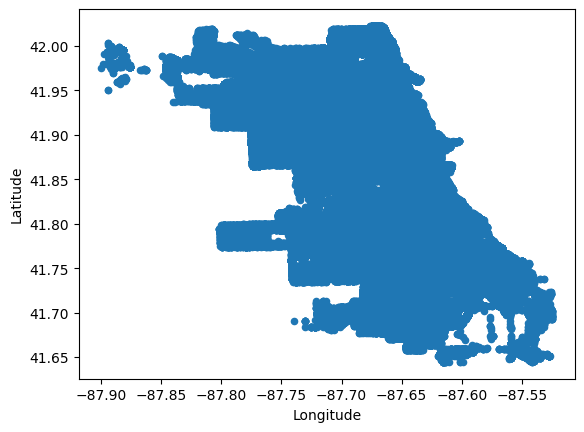

In [31]:
df.plot(kind='scatter', x='Longitude', y='Latitude')
plt.show()

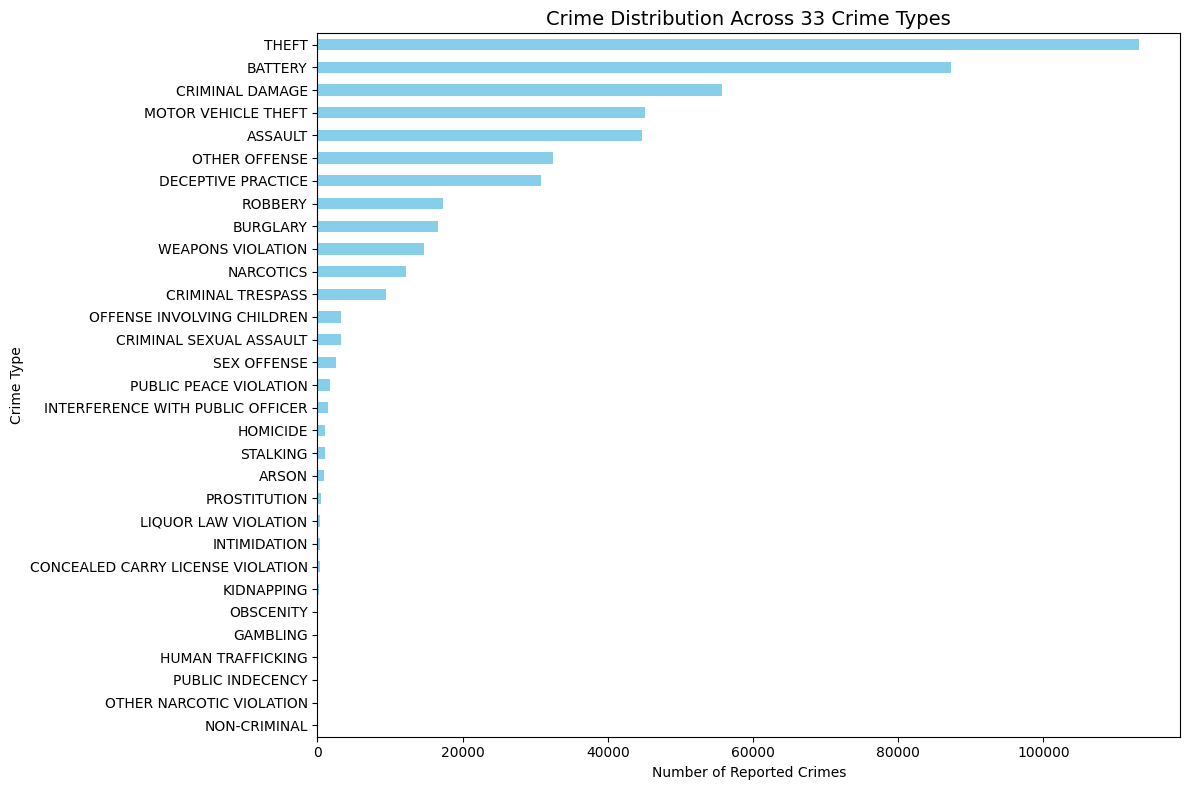

In [32]:
crime_count = df['Primary Type'].value_counts()
plt.figure(figsize=(12,8))
crime_count.sort_values(ascending=True).plot(kind='barh',color='skyblue')
plt.title('Crime Distribution Across 33 Crime Types', fontsize=14)
plt.xlabel('Number of Reported Crimes')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()

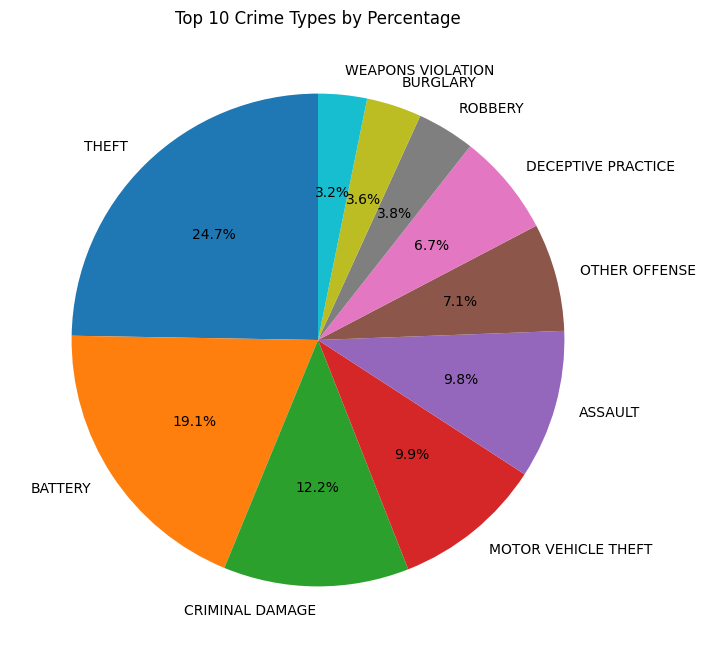

In [33]:
crime_percentage = (crime_count / crime_count.sum()) * 100
crime_percentage = crime_percentage.round(2)
top_10 = crime_percentage.head(10)  # show only top 10 for clarity
plt.figure(figsize=(8,8))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Crime Types by Percentage')
plt.show()


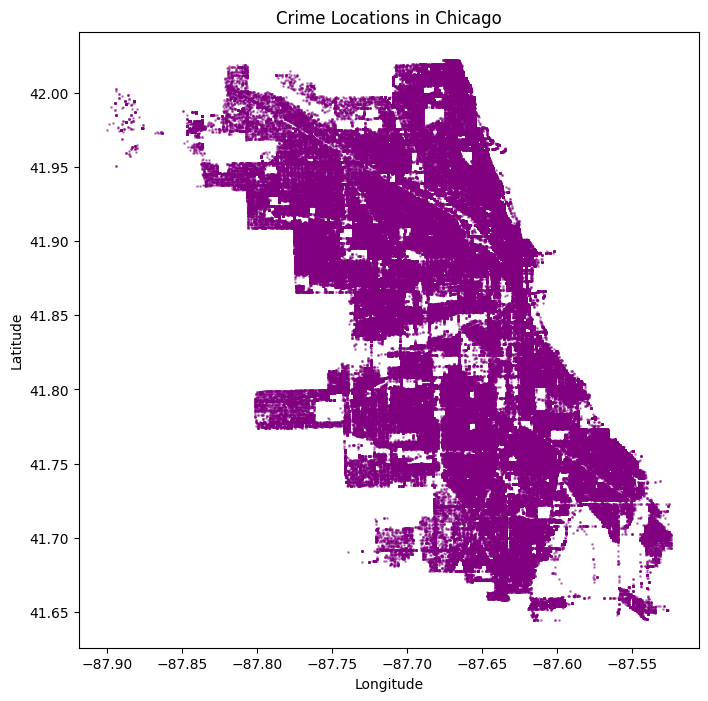

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(df['Longitude'], df['Latitude'], s=1, alpha=0.4, color='purple')
plt.title('Crime Locations in Chicago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
import pandas as pd
df=pd.read_csv('Crimes_2023_to_2025_CLEANED.csv')

In [35]:
import folium

In [36]:
# Center map around Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Add sample points (only first 500 for speed)
for _, row in df.head(500).iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=1,
        color='red',
        fill=True
    ).add_to(m)

m.save('chicago_crimes_map.html')


           Latitude  Longitude
District                      
1         41.872419 -87.628387
2         41.810019 -87.609427
3         41.771020 -87.595514
4         41.731523 -87.562921
5         41.687482 -87.621677


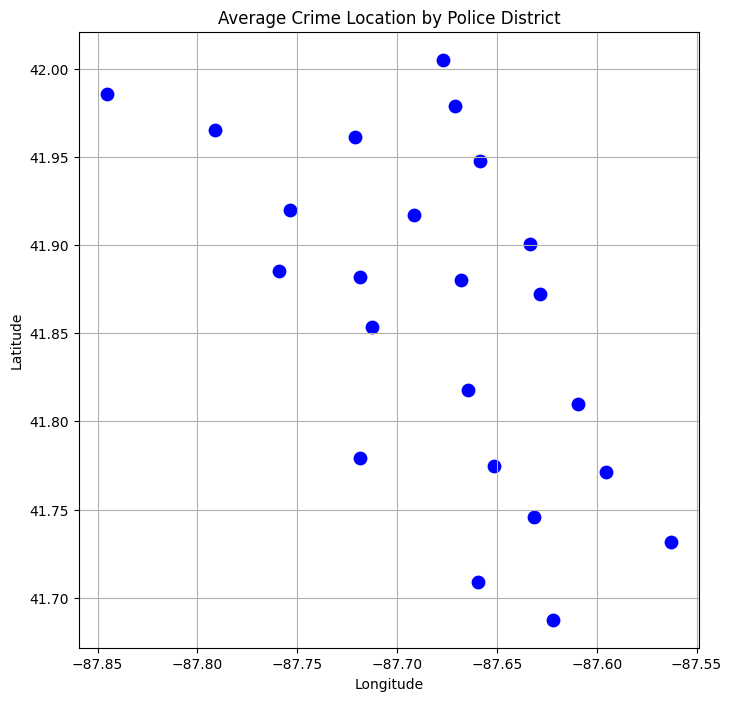

In [37]:
district_geo = df.groupby('District')[['Latitude','Longitude']].mean()
print(district_geo.head())
plt.figure(figsize=(8,8))
plt.scatter(district_geo['Longitude'], district_geo['Latitude'], c='blue', s=80)
plt.title('Average Crime Location by Police District')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()



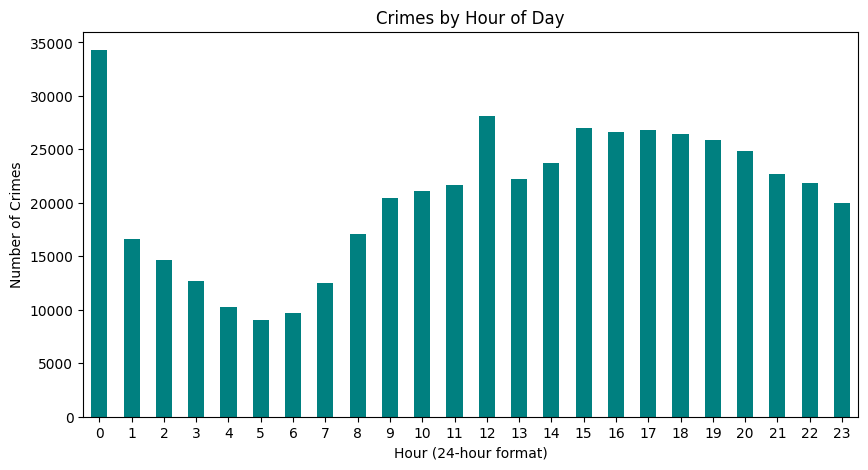

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df['Hour'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Crimes by Hour of Day')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.show()


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496465 entries, 0 to 496464
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    496465 non-null  int64  
 1   Case Number           496465 non-null  object 
 2   IUCR                  496465 non-null  object 
 3   FBI Code              496465 non-null  object 
 4   Primary Type          496465 non-null  object 
 5   Description           496465 non-null  object 
 6   Location Description  496465 non-null  object 
 7   Date                  496465 non-null  object 
 8   Year                  496465 non-null  int64  
 9   Updated On            496465 non-null  object 
 10  Block                 496465 non-null  object 
 11  Latitude              496465 non-null  float64
 12  Longitude             496465 non-null  float64
 13  Location              496465 non-null  object 
 14  X Coordinate          496465 non-null  float64
 15  

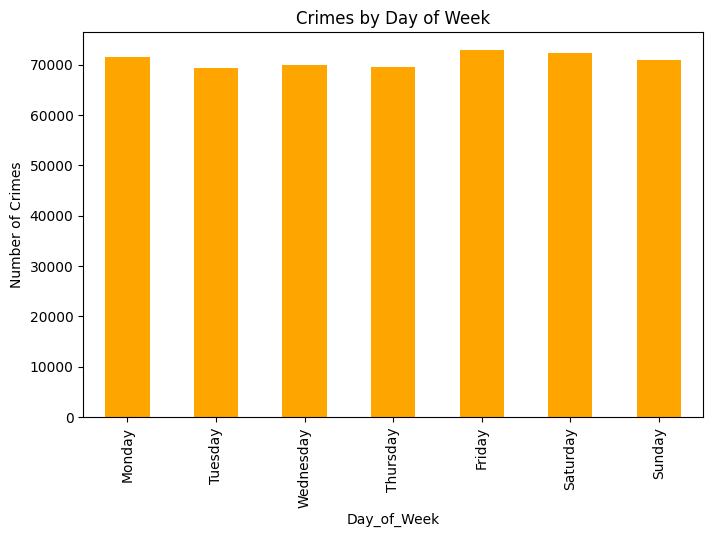

In [40]:
plt.figure(figsize=(8,5))
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['Day_of_Week'].value_counts().reindex(order).plot(kind='bar', color='orange')
plt.title('Crimes by Day of Week')
plt.ylabel('Number of Crimes')
plt.show()


In [ ]:
df['Month'].head()

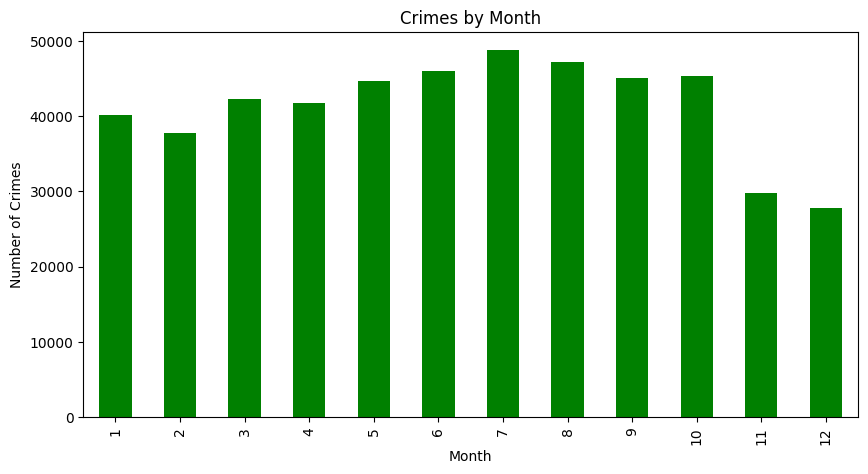

In [41]:
month_order = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.figure(figsize=(10,5))
df['Month'].value_counts().reindex(month_order).plot(kind='bar', color='green')
plt.title('Crimes by Month')
plt.ylabel('Number of Crimes')
plt.show()


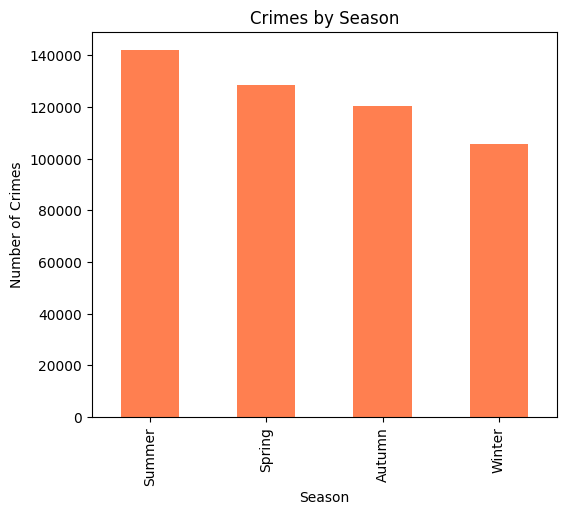

In [42]:
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].map(get_season)

plt.figure(figsize=(6,5))
df['Season'].value_counts().plot(kind='bar', color='coral')
plt.title('Crimes by Season')
plt.ylabel('Number of Crimes')
plt.show()


In [43]:
arrest_rate = df['Arrest'].mean() * 100
print(f"Overall Arrest Rate: {arrest_rate:.2f}%")


Overall Arrest Rate: 13.76%


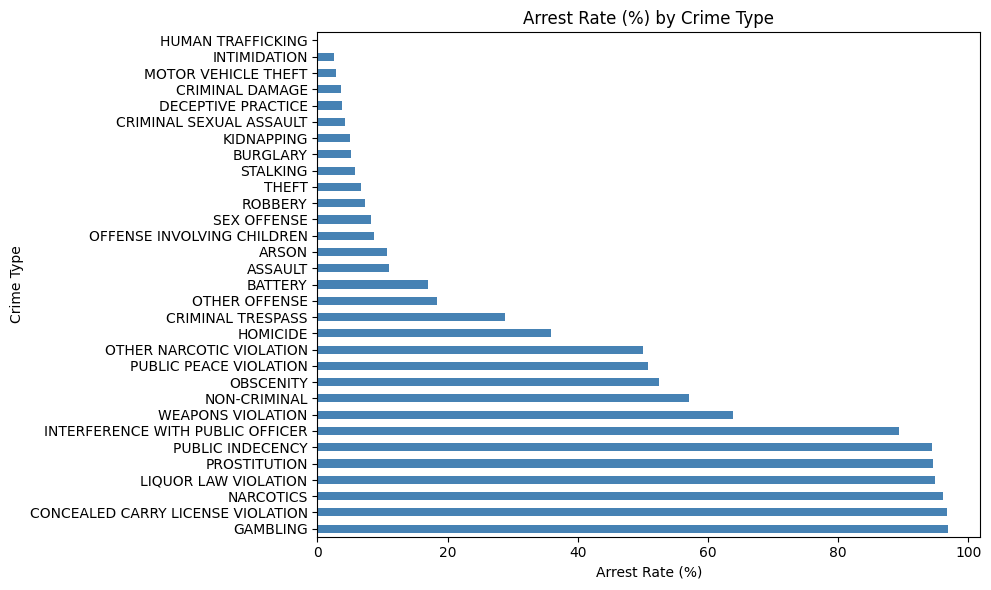

In [44]:
arrest_by_type = df.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False) * 100

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
arrest_by_type.plot(kind='barh', color='steelblue')
plt.title('Arrest Rate (%) by Crime Type')
plt.xlabel('Arrest Rate (%)')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()


In [45]:
domestic_rate = df['Domestic'].mean() * 100
print(f"Percentage of Domestic Crimes: {domestic_rate:.2f}%")


Percentage of Domestic Crimes: 18.46%


Domestic
False    13.572983
True     14.600978
Name: Arrest, dtype: float64


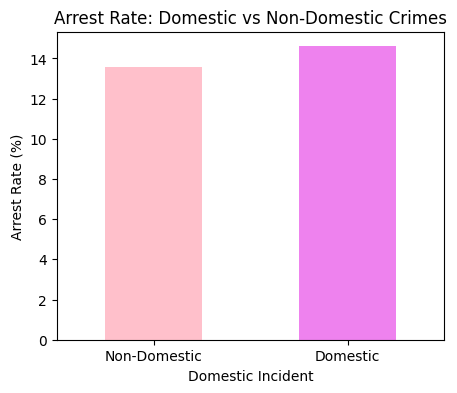

In [46]:
arrest_domestic = df.groupby('Domestic')['Arrest'].mean() * 100
print(arrest_domestic)

arrest_domestic.plot(kind='bar', color=['pink', 'violet'], figsize=(5,4))
plt.title('Arrest Rate: Domestic vs Non-Domestic Crimes')
plt.xlabel('Domestic Incident')
plt.ylabel('Arrest Rate (%)')
plt.xticks(ticks=[0,1], labels=['Non-Domestic','Domestic'], rotation=0)
plt.show()


In [47]:
correlation = df['Arrest'].astype(int).corr(df['Domestic'].astype(int))
print(f"Correlation between Arrest and Domestic incidents: {correlation:.3f}")


Correlation between Arrest and Domestic incidents: 0.012


                  ID Case Number    IUCR FBI Code Primary Type Description  \
count   4.964650e+05      496465  496465   496465       496465      496465   
unique           NaN      496433     352       26           31         330   
top              NaN    JJ318710    0486       06        THEFT      SIMPLE   
freq             NaN           3   38792   115647       113162       60177   
mean    1.345008e+07         NaN     NaN      NaN          NaN         NaN   
std     6.983671e+05         NaN     NaN      NaN          NaN         NaN   
min     2.728300e+04         NaN     NaN      NaN          NaN         NaN   
25%     1.320905e+07         NaN     NaN      NaN          NaN         NaN   
50%     1.347848e+07         NaN     NaN      NaN          NaN         NaN   
75%     1.374593e+07         NaN     NaN      NaN          NaN         NaN   
max     1.402418e+07         NaN     NaN      NaN          NaN         NaN   

       Location Description                 Date           Year

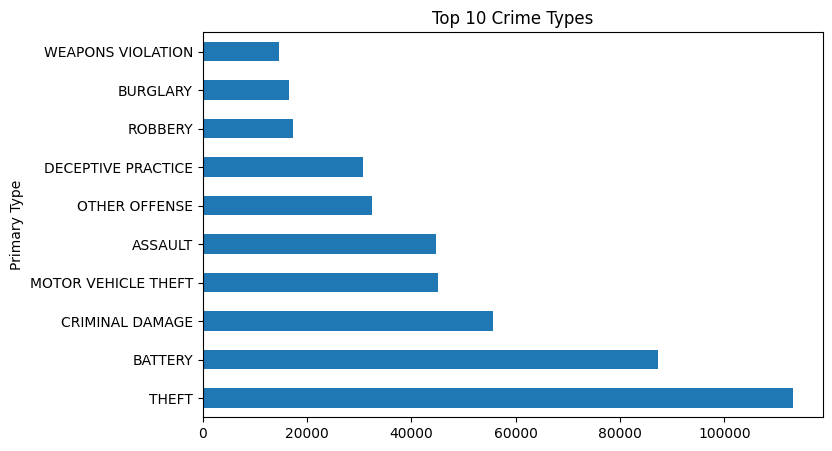

In [48]:
print(df.describe(include='all'))
# Summary of numerical data
print(df[['Latitude', 'Longitude']].describe())

# Summary of categorical data
print(df['Primary Type'].value_counts())

# Arrest rate
print(df['Arrest'].value_counts(normalize=True) * 100)

# Domestic incident rate
print(df['Domestic'].value_counts(normalize=True) * 100)

# Top 10 crime types
top_crimes = df['Primary Type'].value_counts().head(10)

# Arrest rate by crime type
arrest_rate = df.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False)

# Domestic vs non-domestic ratio by crime type
domestic_rate = df.groupby('Primary Type')['Domestic'].mean().sort_values(ascending=False)

# Crime frequency by district
crime_district = df['District'].value_counts().head(10)

print("Top 10 Crime Types:\n", top_crimes)
print("\nArrest Rate by Crime Type:\n", arrest_rate)    
print("\nDomestic Incident Rate by Crime Type:\n", domestic_rate)
print("\nTop 10 Districts by Crime Frequency:\n", crime_district)

import matplotlib.pyplot as plt

top_crimes.plot(kind='barh', title='Top 10 Crime Types', figsize=(8,5))
plt.show()



# **Feature Engineering**

In [70]:
df.to_csv('Crimes_2023_to_2025_CLEANED.csv', index=False)


In [49]:
# Function to map month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # 9, 10, 11
        return 'Fall'

# Create Season column
df['Season'] = df['Month'].apply(month_to_season)

# Check
df[['Month', 'Season']].sample(10)


Month  Season
378805     10    Fall
112797      1  Winter
237658      5  Spring
276994      4  Spring
254715      4  Spring
261451      5  Spring
128882     12  Winter
288116      6  Summer
7579        2  Winter
119124      9    Fall

In [ ]:
df.info()

In [50]:
from sklearn.cluster import KMeans
import pandas as pd

# --- District Clustering using K-Means ---
# Select coordinates
coords = df[['Latitude', 'Longitude']]

# Fit K-Means (let’s say 10 clusters)
kmeans = KMeans(n_clusters=10, random_state=42)
df['Geo_Cluster'] = kmeans.fit_predict(coords)

# --- Coordinate Binning ---
# For Latitude
df['Lat_Bin'] = pd.cut(df['Latitude'], bins=10, labels=False)

# For Longitude
df['Lon_Bin'] = pd.cut(df['Longitude'], bins=10, labels=False)

# Check
df[['Latitude', 'Longitude', 'Geo_Cluster', 'Lat_Bin', 'Lon_Bin']].head(10)


Latitude  Longitude  Geo_Cluster  Lat_Bin  Lon_Bin
0  41.663853 -87.558054            8        0        9
1  41.651431 -87.527258            8        0        9
2  41.998349 -87.691122            5        9        5
3  41.994989 -87.887713            9        9        0
4  41.751204 -87.565007            8        2        8
5  41.895732 -87.687784            4        6        5
6  41.901781 -87.725052            6        6        4
7  41.861407 -87.658134            2        5        6
8  41.782759 -87.655773            7        3        6
9  41.895894 -87.677965            0        6        5

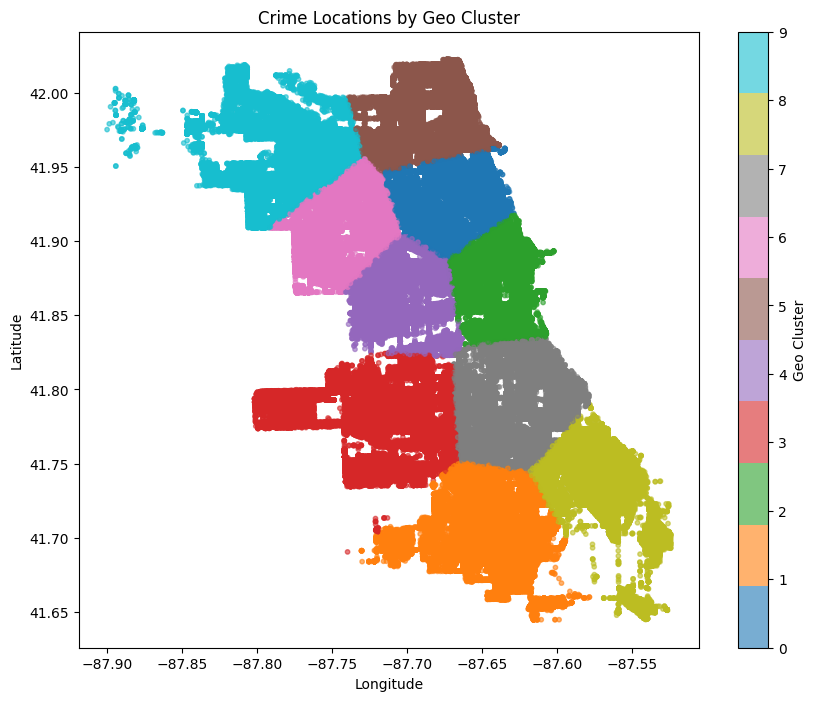

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
# Scatter plot, colored by Geo_Cluster
plt.scatter(df['Longitude'], df['Latitude'], c=df['Geo_Cluster'], cmap='tab10', s=10, alpha=0.6)
plt.colorbar(label='Geo Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Locations by Geo Cluster')
plt.show()


In [60]:
# Count of each crime type
crime_counts = df['Primary Type'].value_counts()
print(crime_counts)


Primary Type
THEFT                                113162
BATTERY                               87301
CRIMINAL DAMAGE                       55689
MOTOR VEHICLE THEFT                   45135
ASSAULT                               44691
OTHER OFFENSE                         32402
DECEPTIVE PRACTICE                    30757
ROBBERY                               17332
BURGLARY                              16544
WEAPONS VIOLATION                     14635
NARCOTICS                             12196
CRIMINAL TRESPASS                      9516
OFFENSE INVOLVING CHILDREN             3220
CRIMINAL SEXUAL ASSAULT                3190
SEX OFFENSE                            2499
PUBLIC PEACE VIOLATION                 1794
INTERFERENCE WITH PUBLIC OFFICER       1422
HOMICIDE                               1084
STALKING                               1044
ARSON                                   921
PROSTITUTION                            464
LIQUOR LAW VIOLATION                    372
INTIMIDATION       

In [61]:
severity_mapping = {
    'HOMICIDE': 5,
    'KIDNAPPING': 5,
    'CRIMINAL SEXUAL ASSAULT': 5,
    'SEX OFFENSE': 4,
    'ARSON': 4,
    'STALKING': 4,
    'OFFENSE INVOLVING CHILDREN': 5,
    'PROSTITUTION': 3,
    'CONCEALED CARRY LICENSE VIOLATION': 3,
    'LIQUOR LAW VIOLATION': 2,
    'INTIMIDATION': 4,
    'ROBBERY': 4,
    'BURGLARY': 4,
    'WEAPONS VIOLATION': 4,
    'NARCOTICS': 3,
    'CRIMINAL TRESPASS': 3,
    'BATTERY': 2,
    'ASSAULT': 3,
    'CRIMINAL DAMAGE': 2,
    'DECEPTIVE PRACTICE': 2,
    'OTHER OFFENSE': 2,
    'MOTOR VEHICLE THEFT': 3,
    'THEFT': 1,
    'PUBLIC PEACE VIOLATION': 2,
    'INTERFERENCE WITH PUBLIC OFFICER': 3,
    'OBSCENITY': 1,
    'GAMBLING': 1,
    'HUMAN TRAFFICKING': 5,
    'PUBLIC INDECENCY': 1,
    'OTHER NARCOTIC VIOLATION': 2,
    'NON-CRIMINAL': 1
}

# Apply to DataFrame
df['Crime_Severity'] = df['Primary Type'].map(severity_mapping)

# Check range
df['Crime_Severity'].describe()


count    496465.000000
mean          2.262385
std           0.978862
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: Crime_Severity, dtype: float64

In [62]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Primary_Type_Code'] = le.fit_transform(df['Primary Type'])
df[['Primary Type', 'Primary_Type_Code']].sample(30)

Primary Type  Primary_Type_Code
127817                THEFT                 29
300810        OTHER OFFENSE                 22
216492    CRIMINAL TRESPASS                  7
89535                 THEFT                 29
255116   DECEPTIVE PRACTICE                  8
387949              BATTERY                  2
56177                 THEFT                 29
361293              ASSAULT                  1
192651                THEFT                 29
321253                THEFT                 29
488276              ASSAULT                  1
105023              BATTERY                  2
88122                 THEFT                 29
485936              ASSAULT                  1
370587            NARCOTICS                 17
302326              BATTERY                  2
205982    WEAPONS VIOLATION                 30
137263              BATTERY                  2
105773                THEFT                 29
207437    CRIMINAL TRESPASS                  7
482172             BURGLARY                  3
104064              BATTERY                  2
178066  MOTOR VEHICLE THEFT                 16
221979  MOTOR VEHICLE THEFT                 16
263969                THEFT                 29
140213              BATTERY                  2
356517      CRIMINAL DAMAGE                  5
451429                THEFT                 29
362529        OTHER OFFENSE                 22
158676      CRIMINAL DAMAGE                  5

In [63]:
location_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(location_map)


{'ARSON': np.int64(0), 'ASSAULT': np.int64(1), 'BATTERY': np.int64(2), 'BURGLARY': np.int64(3), 'CONCEALED CARRY LICENSE VIOLATION': np.int64(4), 'CRIMINAL DAMAGE': np.int64(5), 'CRIMINAL SEXUAL ASSAULT': np.int64(6), 'CRIMINAL TRESPASS': np.int64(7), 'DECEPTIVE PRACTICE': np.int64(8), 'GAMBLING': np.int64(9), 'HOMICIDE': np.int64(10), 'HUMAN TRAFFICKING': np.int64(11), 'INTERFERENCE WITH PUBLIC OFFICER': np.int64(12), 'INTIMIDATION': np.int64(13), 'KIDNAPPING': np.int64(14), 'LIQUOR LAW VIOLATION': np.int64(15), 'MOTOR VEHICLE THEFT': np.int64(16), 'NARCOTICS': np.int64(17), 'NON-CRIMINAL': np.int64(18), 'OBSCENITY': np.int64(19), 'OFFENSE INVOLVING CHILDREN': np.int64(20), 'OTHER NARCOTIC VIOLATION': np.int64(21), 'OTHER OFFENSE': np.int64(22), 'PROSTITUTION': np.int64(23), 'PUBLIC INDECENCY': np.int64(24), 'PUBLIC PEACE VIOLATION': np.int64(25), 'ROBBERY': np.int64(26), 'SEX OFFENSE': np.int64(27), 'STALKING': np.int64(28), 'THEFT': np.int64(29), 'WEAPONS VIOLATION': np.int64(30)}


In [64]:
le = LabelEncoder()
df['Location_Code'] = le.fit_transform(df['Location Description'].astype(str))
df[['Location Description', 'Location_Code']].sample(10)

Location Description  Location_Code
222290                    APARTMENT             16
355737                    APARTMENT             16
489248                     SIDEWALK            117
22191   RESIDENCE - PORCH / HALLWAY            106
419546                    APARTMENT             16
322506                       STREET            121
213841                    APARTMENT             16
455207                       STREET            121
434034                    APARTMENT             16
460793        TAVERN / LIQUOR STORE            123

In [65]:
#Frequency Encoding (Smarter for ML)
location_freq = df['Location Description'].value_counts().to_dict()
df['Location_Freq'] = df['Location Description'].map(location_freq)
df[['Location Description', 'Location_Freq']].sample(10)

Location Description  Location_Freq
375172                                          APARTMENT          94874
478878                                           SIDEWALK          25851
102639                                          RESIDENCE          59467
166347                                          APARTMENT          94874
473422                                          APARTMENT          94874
268261                                          APARTMENT          94874
466099                                             STREET         138298
367921  VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER...            210
473089                                          RESIDENCE          59467
247241                                          APARTMENT          94874

In [66]:
from sklearn.preprocessing import StandardScaler

# Select only coordinate columns
coords = df[['Latitude', 'Longitude']].copy()

# Apply Standard Scaling
scaler = StandardScaler()
df[['Latitude_scaled', 'Longitude_scaled']] = scaler.fit_transform(coords)

# Check a few rows
df[['Latitude', 'Longitude', 'Latitude_scaled', 'Longitude_scaled']].head()


Latitude  Longitude  Latitude_scaled  Longitude_scaled
0  41.663853 -87.558054        -2.102388          1.891450
1  41.651431 -87.527258        -2.245517          2.422079
2  41.998349 -87.691122         1.751930         -0.401405
3  41.994989 -87.887713         1.713208         -3.788780
4  41.751204 -87.565007        -1.095856          1.771636

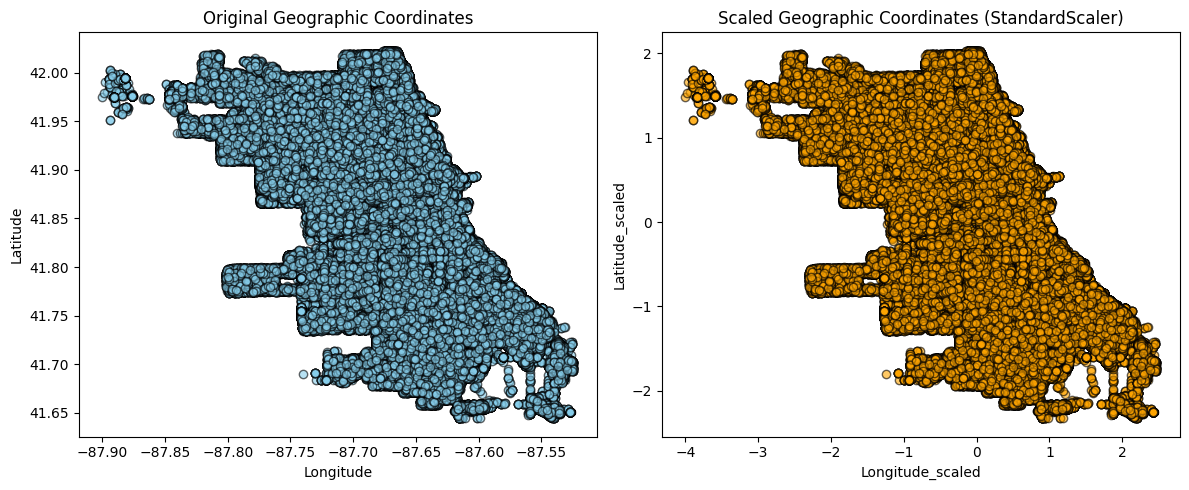

In [67]:
import matplotlib.pyplot as plt

# Set up a figure with two subplots
plt.figure(figsize=(12, 5))

# --- Original Coordinates ---
plt.subplot(1, 2, 1)
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.6, c='skyblue', edgecolor='k')
plt.title('Original Geographic Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# --- Scaled Coordinates ---
plt.subplot(1, 2, 2)
plt.scatter(df['Longitude_scaled'], df['Latitude_scaled'], alpha=0.6, c='orange', edgecolor='k')
plt.title('Scaled Geographic Coordinates (StandardScaler)')
plt.xlabel('Longitude_scaled')
plt.ylabel('Latitude_scaled')

plt.tight_layout()
plt.show()


In [ ]:
df.info()

# **UnSupervised Learning**

### Geographical Clustering

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496465 entries, 0 to 496464
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    496465 non-null  int64  
 1   Case Number           496465 non-null  object 
 2   IUCR                  496465 non-null  object 
 3   FBI Code              496465 non-null  object 
 4   Primary Type          496465 non-null  object 
 5   Description           496465 non-null  object 
 6   Location Description  496465 non-null  object 
 7   Date                  496465 non-null  object 
 8   Year                  496465 non-null  int64  
 9   Updated On            496465 non-null  object 
 10  Block                 496465 non-null  object 
 11  Latitude              496465 non-null  float64
 12  Longitude             496465 non-null  float64
 13  Location              496465 non-null  object 
 14  X Coordinate          496465 non-null  float64
 15  

In [1]:
import pandas as pd
df = pd.read_csv('Crimes_2023_to_2025_CLEANED.csv')

In [105]:
df_sample = df.sample(n=20000, random_state=42)


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

X = df[['Latitude_scaled','Longitude_scaled']]

# Try different K values
scores = {}
for k in range(3,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sil = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)
    scores[k] = (sil, dbi)

print(scores)

: 

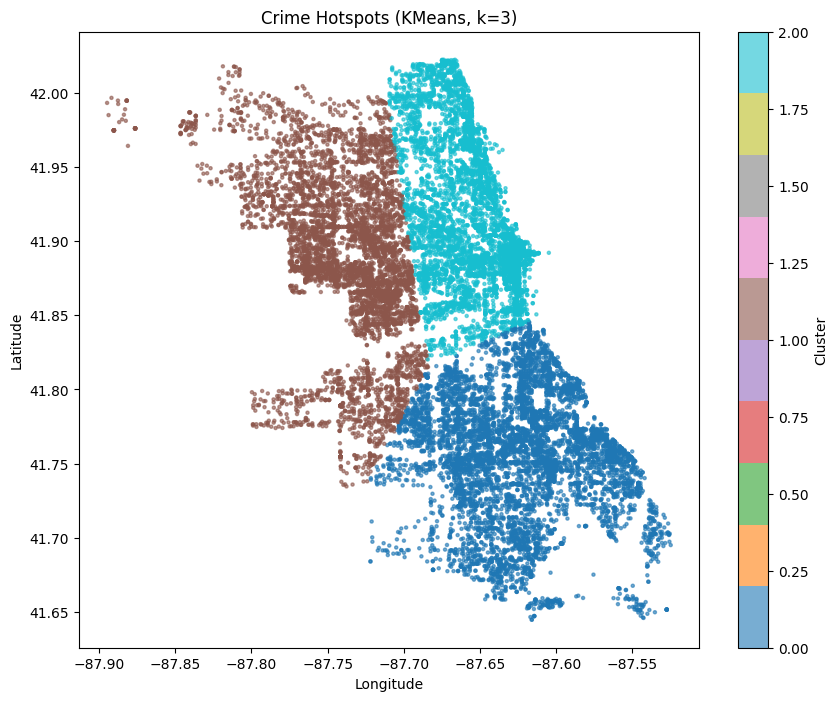

In [107]:
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
df_sample['KMeans_Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10,8))
plt.scatter(df_sample['Longitude'], df_sample['Latitude'], 
            c=df_sample['KMeans_Cluster'], cmap='tab10', s=5, alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Crime Hotspots (KMeans, k={best_k})')
plt.show()

In [108]:
cluster_summary = df_sample.groupby('KMeans_Cluster')['Primary Type'].value_counts(normalize=True)
print(cluster_summary.head(20))

KMeans_Cluster  Primary Type                    
0               BATTERY                             0.192681
                THEFT                               0.172482
                CRIMINAL DAMAGE                     0.132608
                MOTOR VEHICLE THEFT                 0.109654
                ASSAULT                             0.105063
                OTHER OFFENSE                       0.074108
                DECEPTIVE PRACTICE                  0.042629
                WEAPONS VIOLATION                   0.039612
                ROBBERY                             0.033578
                BURGLARY                            0.031217
                CRIMINAL TRESPASS                   0.015740
                NARCOTICS                           0.014297
                OFFENSE INVOLVING CHILDREN          0.008395
                CRIMINAL SEXUAL ASSAULT             0.006165
                HOMICIDE                            0.004460
                INTERFERENCE WITH PU

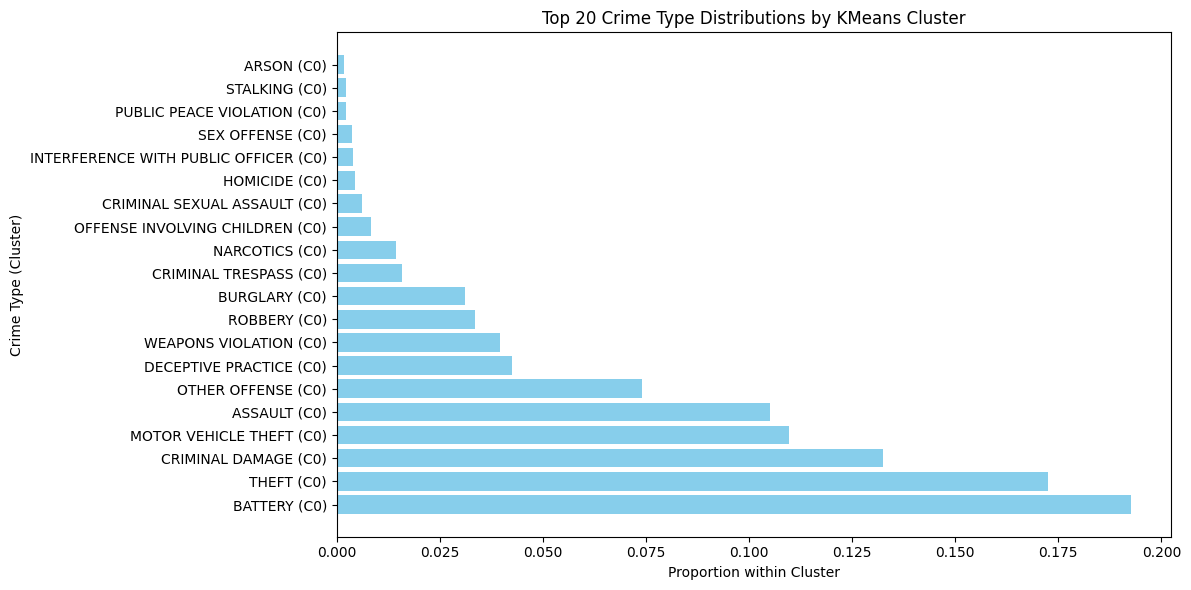

In [109]:
import matplotlib.pyplot as plt

# Reset index to get a DataFrame
cluster_summary_df = cluster_summary.reset_index()
cluster_summary_df.columns = ['Cluster', 'Primary Type', 'Proportion']

# Plot top 20 rows (as you printed)
top20 = cluster_summary_df.head(20)

plt.figure(figsize=(12,6))
bars = plt.barh(top20['Primary Type'] + " (C" + top20['Cluster'].astype(str) + ")", 
                top20['Proportion'], color='skyblue')

plt.xlabel("Proportion within Cluster")
plt.ylabel("Crime Type (Cluster)")
plt.title("Top 20 Crime Type Distributions by KMeans Cluster")
plt.tight_layout()
plt.show()

Number of clusters: 2
Noise points: 0
Silhouette: 0.5344091806433615 DBI: 0.3501231004327407


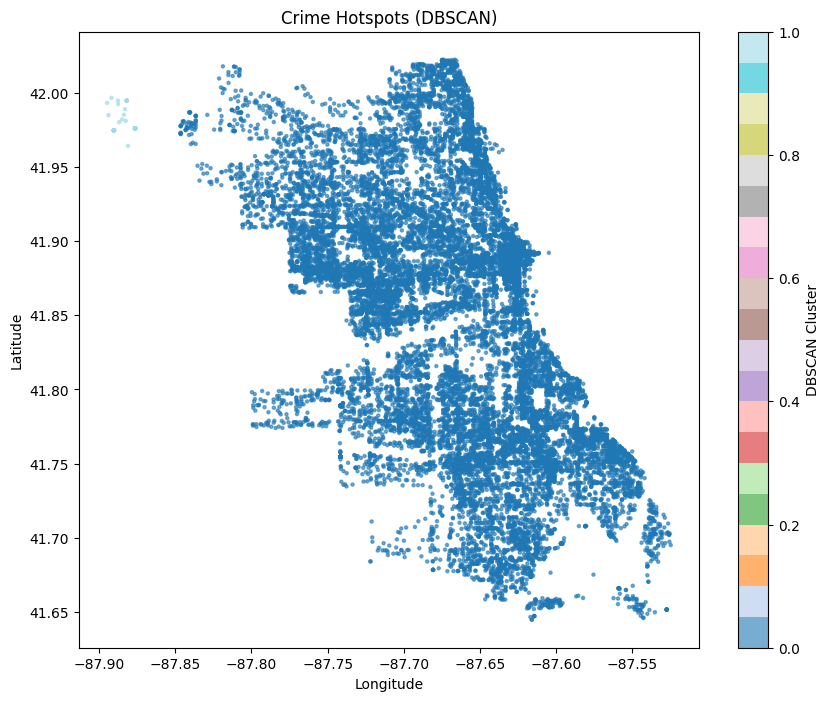

In [110]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

X = df_sample[['Latitude_scaled','Longitude_scaled']]
dbscan = DBSCAN(eps=0.4, min_samples=40)  # tune these values
labels = dbscan.fit_predict(X)

df_sample['DBSCAN_Cluster'] = labels
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)
print("Noise points:", list(labels).count(-1))

if n_clusters > 1:
    sil = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)
    print("Silhouette:", sil, "DBI:", dbi)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(df_sample['Longitude'], df_sample['Latitude'], 
            c=df_sample['DBSCAN_Cluster'], cmap='tab20', s=5, alpha=0.6)
plt.colorbar(label='DBSCAN Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Hotspots (DBSCAN)')
plt.show()

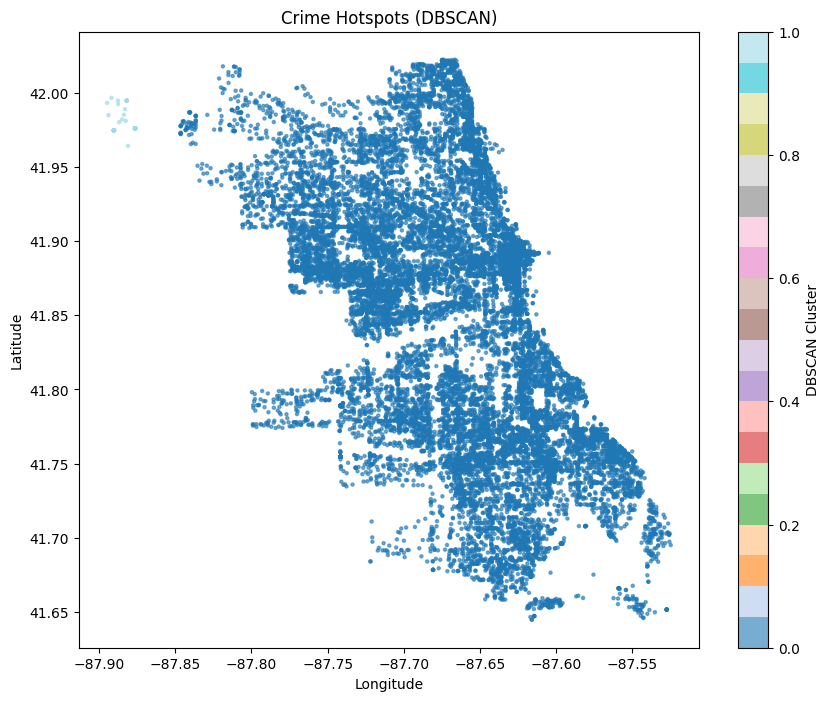

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(df_sample['Longitude'], df_sample['Latitude'], 
            c=df_sample['DBSCAN_Cluster'], cmap='tab20', s=5, alpha=0.6)
plt.colorbar(label='DBSCAN Cluster')
plt.title('Crime Hotspots (DBSCAN)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [112]:
cluster_summary = (
    df_sample.groupby('DBSCAN_Cluster')['Primary Type']
      .value_counts(normalize=True)
      .rename('Proportion')
      .reset_index()
)

print(cluster_summary.head(20))

    DBSCAN_Cluster                      Primary Type  Proportion
0                0                             THEFT    0.229309
1                0                           BATTERY    0.175551
2                0                   CRIMINAL DAMAGE    0.117385
3                0               MOTOR VEHICLE THEFT    0.092034
4                0                           ASSAULT    0.087625
5                0                     OTHER OFFENSE    0.064178
6                0                DECEPTIVE PRACTICE    0.061573
7                0                           ROBBERY    0.034669
8                0                          BURGLARY    0.033267
9                0                 WEAPONS VIOLATION    0.029158
10               0                         NARCOTICS    0.024198
11               0                 CRIMINAL TRESPASS    0.017735
12               0        OFFENSE INVOLVING CHILDREN    0.006313
13               0           CRIMINAL SEXUAL ASSAULT    0.006162
14               0       

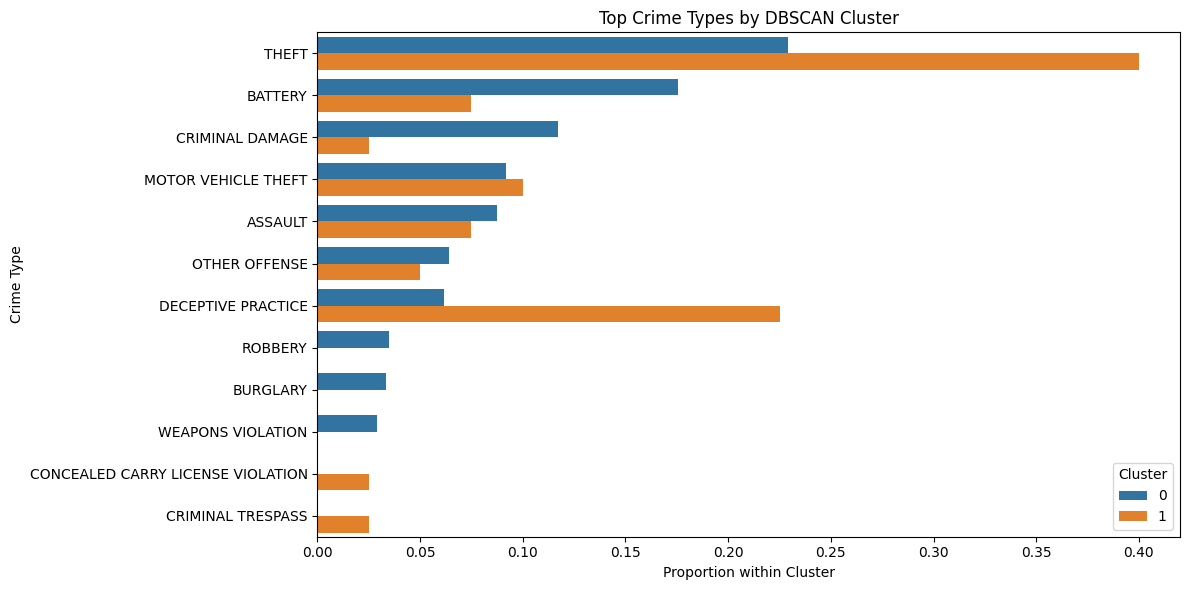

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

top_per_cluster = cluster_summary.groupby('DBSCAN_Cluster').head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_per_cluster,
            x='Proportion', y='Primary Type',
            hue='DBSCAN_Cluster')
plt.title('Top Crime Types by DBSCAN Cluster')
plt.xlabel('Proportion within Cluster')
plt.ylabel('Crime Type')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

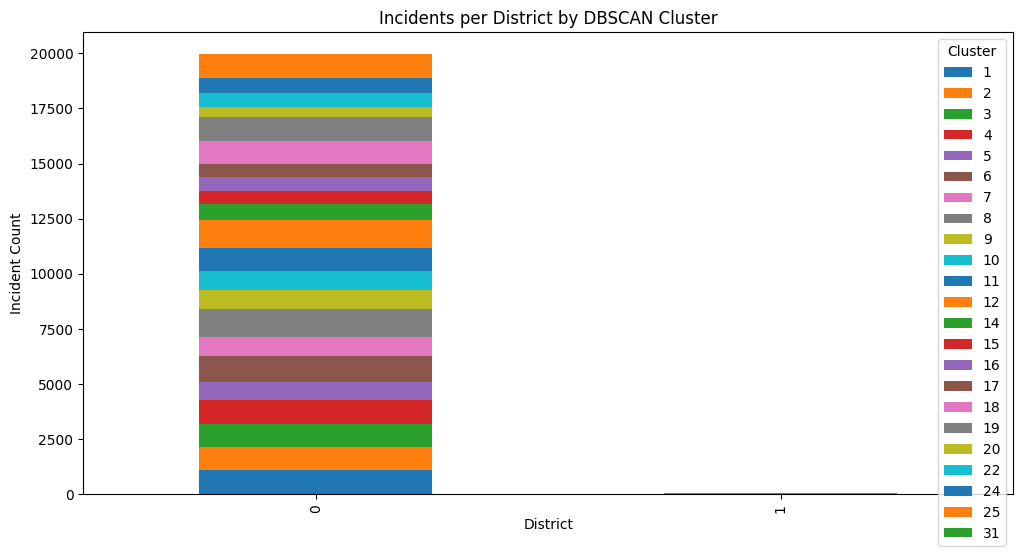

In [114]:
district_cluster = df_sample.groupby(['DBSCAN_Cluster','District']).size().unstack(fill_value=0)

district_cluster.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Incidents per District by DBSCAN Cluster")
plt.xlabel("District")
plt.ylabel("Incident Count")
plt.legend(title="Cluster")
plt.show()

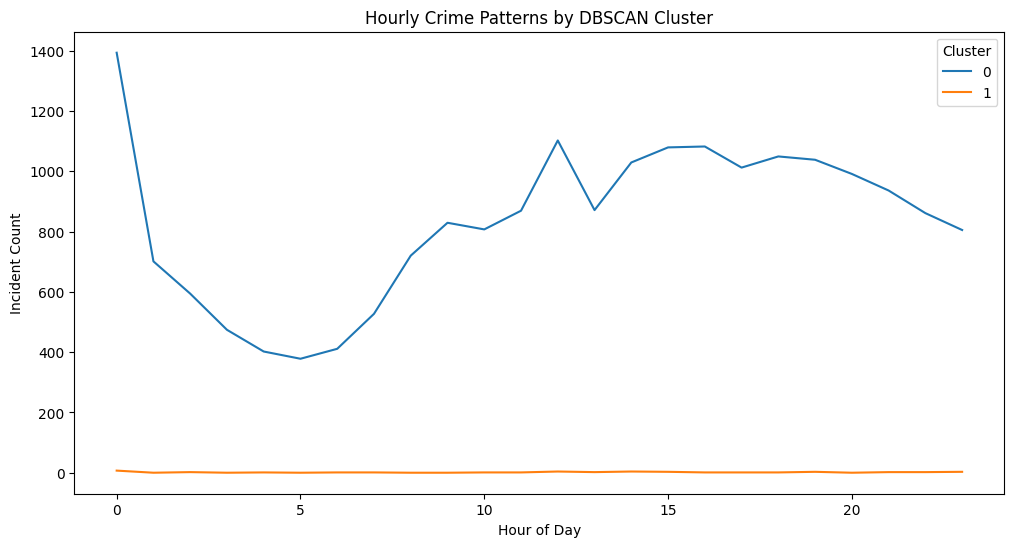

In [115]:
hour_cluster = df_sample.groupby(['DBSCAN_Cluster','Hour']).size().unstack(fill_value=0).T

hour_cluster.plot(figsize=(12,6))
plt.title("Hourly Crime Patterns by DBSCAN Cluster")
plt.xlabel("Hour of Day")
plt.ylabel("Incident Count")
plt.legend(title="Cluster")
plt.show()

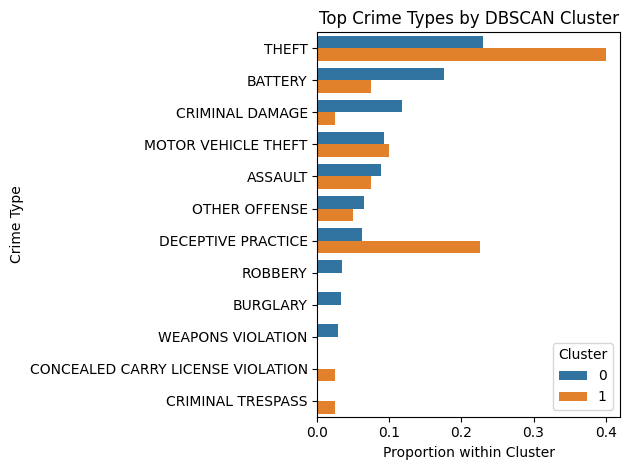

In [97]:
cluster_summary = (
    df_sample.groupby('DBSCAN_Cluster')['Primary Type']
      .value_counts(normalize=True)
      .rename('Proportion')
      .reset_index()
)

top_per_cluster = cluster_summary.groupby('DBSCAN_Cluster').head(10)

sns.barplot(data=top_per_cluster, x='Proportion', y='Primary Type', hue='DBSCAN_Cluster')
plt.title("Top Crime Types by DBSCAN Cluster")
plt.xlabel("Proportion within Cluster")
plt.ylabel("Crime Type")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

Silhouette: 0.34475376291852994
DBI: 0.850600461305109


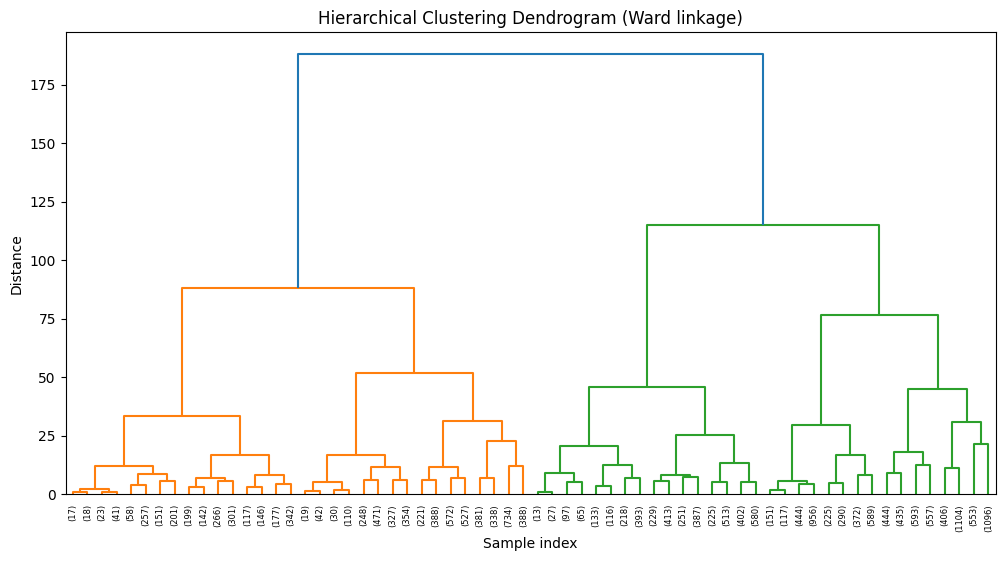

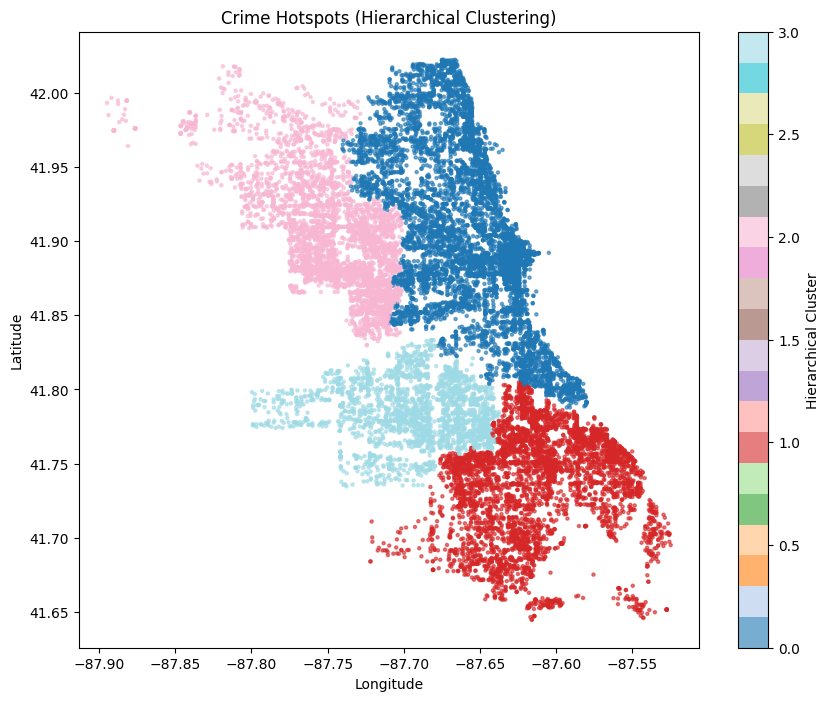

In [116]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = agg.fit_predict(X)
df_sample['HierCluster'] = labels
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil = silhouette_score(X, labels)
dbi = davies_bouldin_score(X, labels)

print("Silhouette:", sil)
print("DBI:", dbi)
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(X, method='ward')
plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()
plt.figure(figsize=(10,8))
plt.scatter(df_sample['Longitude'], df_sample['Latitude'], 
            c=df_sample['HierCluster'], cmap='tab20', s=5, alpha=0.6)
plt.colorbar(label='Hierarchical Cluster')
plt.title('Crime Hotspots (Hierarchical Clustering)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

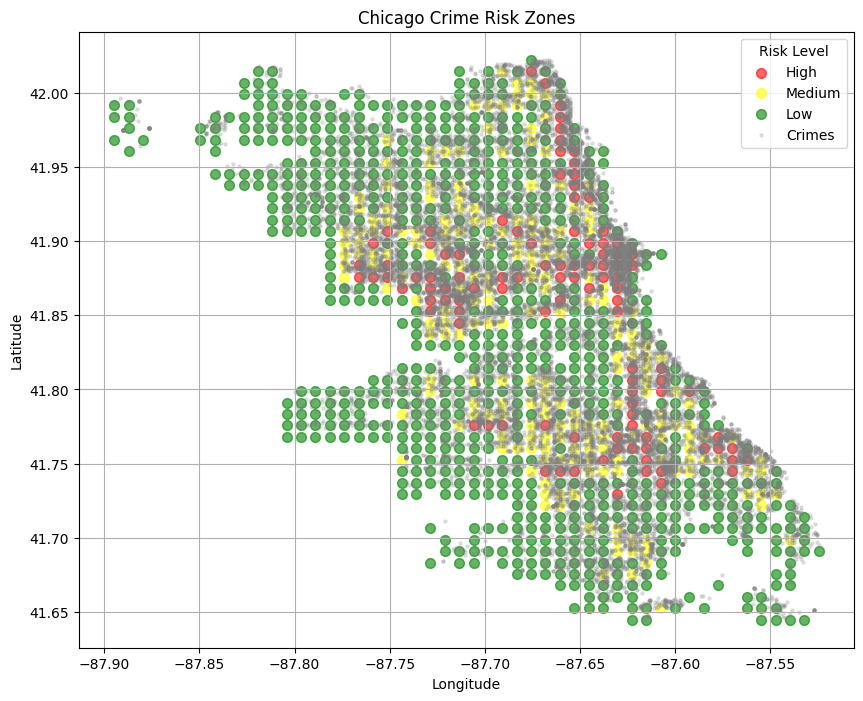

In [129]:
import numpy as np

# Define grid resolution
lat_bins = np.linspace(df_sample['Latitude'].min(), df_sample['Latitude'].max(), 50)
lon_bins = np.linspace(df_sample['Longitude'].min(), df_sample['Longitude'].max(), 50)

# Assign each crime to a grid cell
df_sample['lat_bin'] = np.digitize(df_sample['Latitude'], lat_bins)
df_sample['lon_bin'] = np.digitize(df_sample['Longitude'], lon_bins)
grid_counts = df_sample.groupby(['lat_bin','lon_bin']).size().reset_index(name='crime_count')
# Quantile thresholds
high_thresh = grid_counts['crime_count'].quantile(0.90)
med_thresh = grid_counts['crime_count'].quantile(0.70)

def classify_risk(count):
    if count >= high_thresh:
        return 'High'
    elif count >= med_thresh:
        return 'Medium'
    else:
        return 'Low'

grid_counts['risk_level'] = grid_counts['crime_count'].apply(classify_risk)
import matplotlib.pyplot as plt
import seaborn as sns

# Merge back to get coordinates
grid_counts['lat_center'] = [lat_bins[i-1] for i in grid_counts['lat_bin']]
grid_counts['lon_center'] = [lon_bins[i-1] for i in grid_counts['lon_bin']]

# Color map
risk_colors = {'High': 'red', 'Medium': 'yellow', 'Low': 'green'}

plt.figure(figsize=(10,8))
for risk, color in risk_colors.items():
    subset = grid_counts[grid_counts['risk_level'] == risk]
    plt.scatter(subset['lon_center'], subset['lat_center'], 
                color=color, label=risk, alpha=0.6, s=50)

# Overlay actual crime points (optional)
plt.scatter(df_sample['Longitude'], df_sample['Latitude'], 
            color='gray', alpha=0.2, s=5, label='Crimes')

plt.title("Chicago Crime Risk Zones")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Risk Level")
plt.grid(True)
plt.show()

### Temporal Clustering

In [ ]:
df_sample.to_csv('Crimes_2023_to_2025_CLEANED.csv', index=False)

In [27]:
df = pd.read_csv('Crimes_2023_to_2025_CLEANED.csv')
df_sample = df.sample(n=20000, random_state=42)

In [12]:
day_mapping = {
    'Monday': 0, 
    'Tuesday': 1, 
    'Wednesday': 2, 
    'Thursday': 3, 
    'Friday': 4, 
    'Saturday': 5, 
    'Sunday': 6
}
df['Day_of_Week_Num'] = df['Day_of_Week'].map(day_mapping)

df_sample['Day_of_Week_Num'] = df_sample['Day_of_Week'].map(day_mapping)


In [13]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Your temporal features
temporal_features = df_sample[['Hour', 'Day_of_Week_Num', 'Month']]

# Create individual scalers
hour_scaler = StandardScaler()
dow_scaler = StandardScaler()
month_scaler = StandardScaler()

# Fit + transform each column separately
df_sample['Hour_scaled'] = hour_scaler.fit_transform(df_sample[['Hour']])
df_sample['Day_scaled'] = dow_scaler.fit_transform(df_sample[['Day_of_Week_Num']])
df_sample['Month_scaled'] = month_scaler.fit_transform(df_sample[['Month']])

# Final data for clustering
X_temp_scaled = df_sample[['Hour_scaled', 'Day_scaled', 'Month_scaled']]

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# X_temp_scaled → your scaled temporal features
# df → your original dataframe with 'hour', 'day_of_week', 'month'

# STEP 1: Find the best K (3 to 5)
best_k = None
best_score = -1

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_temp_scaled)
    score = silhouette_score(X_temp_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")
    if score > best_score:
        best_score = score
        best_k = k

print("\nBest K =", best_k)

# STEP 2: Fit final KMeans
kmeans = KMeans(n_clusters=best_k, random_state=42)
df_sample['time_cluster'] = kmeans.fit_predict(X_temp_scaled)

# STEP 3: Convert cluster centers back to original scale
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['hour_scaled','dow_scaled','month_scaled'])

# If you have scalers:
centers['hour'] = hour_scaler.inverse_transform(centers[['hour_scaled']])
centers['day_of_week'] = dow_scaler.inverse_transform(centers[['dow_scaled']])
centers['month'] = month_scaler.inverse_transform(centers[['month_scaled']])

print("\n=== Cluster Centers (Actual Time Patterns) ===")
print(centers[['hour','day_of_week','month']])

# STEP 4: Print real crime pattern descriptions
print("\n=== Time-Based Crime Patterns ===")
for c in range(best_k):
    sub = df_sample[df_sample['time_cluster'] == c]
    print(f"\nCluster {c}:")
    print(f"  Avg Hour        : {sub['Hour'].mean():.1f}")
    print(f"  Peak Day        : {sub['Day_of_Week'].mode()[0]}")
    print(f"  Peak Month      : {sub['Month'].mode()[0]}")
    print(f"  Count of Crimes : {len(sub)}")


K=2, Silhouette Score=0.241
K=3, Silhouette Score=0.241
K=4, Silhouette Score=0.260
K=5, Silhouette Score=0.272

Best K = 5

=== Cluster Centers (Actual Time Patterns) ===
        hour  day_of_week     month
0  16.081051     1.450088  8.911440
1   4.519102     1.355206  5.900846
2  16.453247     2.791471  2.813380
3   4.299935     5.101810  5.979315
4  16.617409     5.005994  8.475893

=== Time-Based Crime Patterns ===

Cluster 0:
  Avg Hour        : 16.1
  Peak Day        : Monday
  Peak Month      : 10
  Count of Crimes : 4528

Cluster 1:
  Avg Hour        : 4.5
  Peak Day        : Monday
  Peak Month      : 6
  Count of Crimes : 3429

Cluster 2:
  Avg Hour        : 16.5
  Peak Day        : Thursday
  Peak Month      : 1
  Count of Crimes : 5112

Cluster 3:
  Avg Hour        : 4.3
  Peak Day        : Sunday
  Peak Month      : 6
  Count of Crimes : 3094

Cluster 4:
  Avg Hour        : 16.6
  Peak Day        : Saturday
  Peak Month      : 9
  Count of Crimes : 3837


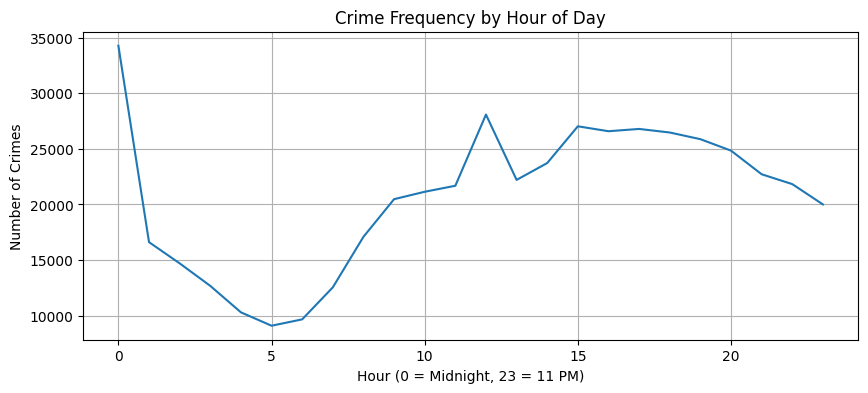


Top 5 High-Risk Crime Hours:
Hour
0     34289
12    28092
15    27036
17    26799
16    26593
dtype: int64


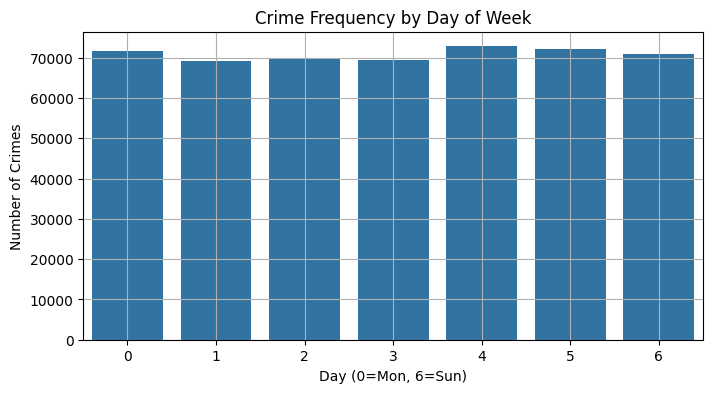


High-Risk Crime Days:
Day_of_Week_Num
4    72832
5    72255
0    71574
6    71002
2    69983
dtype: int64


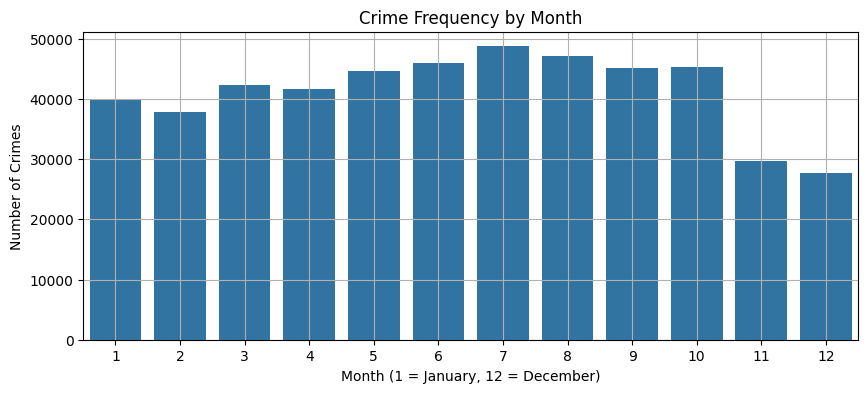


Peak Crime Months:
Month
7     48751
8     47204
6     46023
10    45390
9     45108
dtype: int64


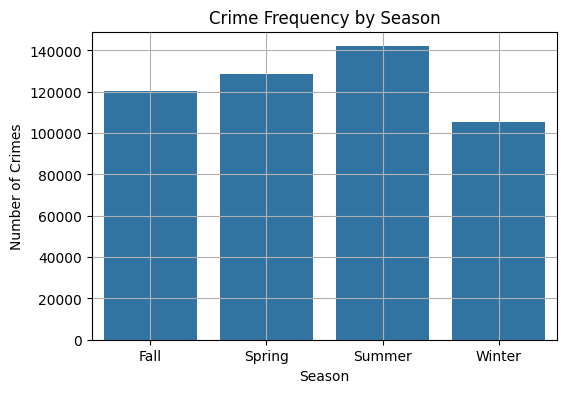


High-Risk Crime Seasons:
Season
Summer    141978
Spring    128656
Fall      120220
Winter    105611
dtype: int64

================= HIGH-RISK TIME PATTERN SUMMARY =================
Peak Crime Hours (Top 3): [0, 12, 15]
Peak Crime Days (Top 3): [4, 5, 0]
Peak Crime Months (Top 3): [7, 8, 6]
Peak Crime Seasons (Top 2): ['Summer', 'Spring']


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. HOURLY CRIME PATTERNS
# -----------------------------

hourly_counts = df.groupby('Hour').size()

plt.figure(figsize=(10,4))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title("Crime Frequency by Hour of Day")
plt.xlabel("Hour (0 = Midnight, 23 = 11 PM)")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()

print("\nTop 5 High-Risk Crime Hours:")
print(hourly_counts.sort_values(ascending=False).head())


# -----------------------------
# 2. WEEKDAY CRIME PATTERNS
# -----------------------------

weekday_counts = df.groupby('Day_of_Week_Num').size()

plt.figure(figsize=(8,4))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title("Crime Frequency by Day of Week")
plt.xlabel("Day (0=Mon, 6=Sun)")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()

print("\nHigh-Risk Crime Days:")
print(weekday_counts.sort_values(ascending=False).head())


# -----------------------------
# 3. MONTHLY CRIME PATTERNS
# -----------------------------

monthly_counts = df.groupby('Month').size()

plt.figure(figsize=(10,4))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title("Crime Frequency by Month")
plt.xlabel("Month (1 = January, 12 = December)")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()

print("\nPeak Crime Months:")
print(monthly_counts.sort_values(ascending=False).head())


# -----------------------------
# 4. SEASONAL CRIME PATTERNS
# -----------------------------

season_counts = df.groupby('Season').size()

plt.figure(figsize=(6,4))
sns.barplot(x=season_counts.index, y=season_counts.values)
plt.title("Crime Frequency by Season")
plt.xlabel("Season")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()

print("\nHigh-Risk Crime Seasons:")
print(season_counts.sort_values(ascending=False))


# -----------------------------
# 5. FINAL HIGH-RISK SUMMARY
# -----------------------------

peak_hours = hourly_counts.sort_values(ascending=False).head(3)
peak_days = weekday_counts.sort_values(ascending=False).head(3)
peak_months = monthly_counts.sort_values(ascending=False).head(3)
peak_seasons = season_counts.sort_values(ascending=False).head(2)

print("\n================= HIGH-RISK TIME PATTERN SUMMARY =================")
print("Peak Crime Hours (Top 3):", peak_hours.index.tolist())
print("Peak Crime Days (Top 3):", peak_days.index.tolist())
print("Peak Crime Months (Top 3):", peak_months.index.tolist())
print("Peak Crime Seasons (Top 2):", list(peak_seasons.index))
print("===================================================================")


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# ------------------------------------------------------
# 1. CREATE NUMERIC DAY OF WEEK
# ------------------------------------------------------

df['Day_of_Week_Num'] = df['Day_of_Week'].map({
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
})

# ------------------------------------------------------
# 2. AGGREGATE TEMPORAL BEHAVIOR PER CRIME TYPE
# ------------------------------------------------------

crime_temporal = df.groupby('Primary Type')[['Hour', 'Day_of_Week_Num', 'Month']].mean()

# ------------------------------------------------------
# 3. NORMALIZE FEATURES FOR CLUSTERING
# ------------------------------------------------------

scaler = StandardScaler()
X_temp = scaler.fit_transform(crime_temporal)

# ------------------------------------------------------
# 4. CLUSTER CRIME TYPES BASED ON TIME PATTERNS
# ------------------------------------------------------

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_temp)

# attach labels to dataset
crime_temporal['Temporal_Cluster'] = labels

# ------------------------------------------------------
# 5. SUMMARIZE CLUSTER BEHAVIOR
# ------------------------------------------------------

cluster_summary = crime_temporal.groupby('Temporal_Cluster').agg({
    'Hour': 'median',
    'Day_of_Week_Num': 'median',
    'Month': 'median'
})

# list top crime types in each cluster
crime_list = crime_temporal.groupby('Temporal_Cluster').apply(
    lambda x: x.index.tolist()
)

print("======= TEMPORAL CRIME BEHAVIOR PROFILES =======")
print(cluster_summary)
print("\nCrime Types per Cluster:")
print(crime_list)


======= TEMPORAL CRIME BEHAVIOR PROFILES =======
                       Hour  Day_of_Week_Num     Month
Temporal_Cluster                                      
0                  5.520000         2.720000  6.680000
1                 13.144570         3.097681  6.336120
2                 15.787879         3.242424  7.818182
3                 11.666667         2.500000  5.071429
4                 11.717172         2.898957  6.252986

Crime Types per Cluster:
Temporal_Cluster
0                                  [HUMAN TRAFFICKING]
1    [ASSAULT, BATTERY, CONCEALED CARRY LICENSE VIO...
2                                           [GAMBLING]
3    [NON-CRIMINAL, OTHER NARCOTIC VIOLATION, PUBLI...
4    [ARSON, BURGLARY, CRIMINAL DAMAGE, CRIMINAL SE...
dtype: object


C:\Users\Tasneem Inayath\AppData\Local\Temp\ipykernel_31848\1781969844.py:48: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  crime_list = crime_temporal.groupby('Temporal_Cluster').apply(


<Axes: xlabel='Hour', ylabel='Day_of_Week_Num'>

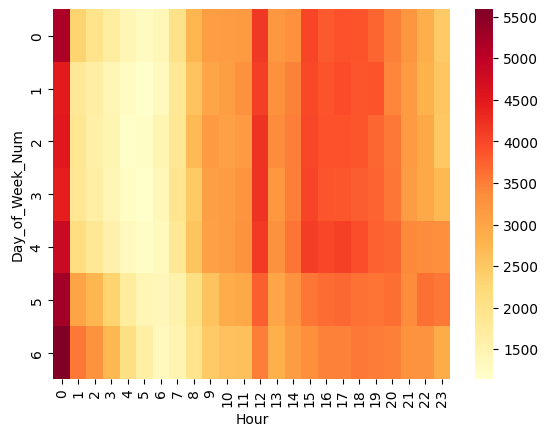

In [20]:
heatmap_data = df.groupby(['Day_of_Week_Num','Hour']).size().unstack()
sns.heatmap(heatmap_data, cmap='YlOrRd')

### PCA

In [6]:
import pandas as pd
df= pd.read_csv('Crimes_2023_to_2025_CLEANED.csv')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

feature_list = [
    'Latitude_scaled', 'Longitude_scaled',
    'Hour_scaled', 'Day_scaled', 'Month_scaled',
    'Crime_Severity', 'Primary_Type_Code',
    'Location_Code', 'Location_Freq',
    'Year', 'District', 'Ward', 'Community Area'
]

X = df[feature_list]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

individual_var = pca.explained_variance_ratio_
cumulative_var = individual_var.cumsum()

for i, (ind, cum) in enumerate(zip(individual_var, cumulative_var), start=1):
    print(f"PC{i}: {ind:.4f} individual, {cum:.4f} cumulative")

PC1: 0.2547 individual, 0.2547 cumulative
PC2: 0.1023 individual, 0.3570 cumulative
PC3: 0.0925 individual, 0.4495 cumulative
PC4: 0.0842 individual, 0.5337 cumulative
PC5: 0.0788 individual, 0.6125 cumulative
PC6: 0.0749 individual, 0.6874 cumulative
PC7: 0.0687 individual, 0.7562 cumulative
PC8: 0.0642 individual, 0.8204 cumulative
PC9: 0.0607 individual, 0.8811 cumulative
PC10: 0.0500 individual, 0.9310 cumulative
PC11: 0.0322 individual, 0.9632 cumulative
PC12: 0.0253 individual, 0.9884 cumulative
PC13: 0.0116 individual, 1.0000 cumulative


In [15]:
import numpy as np

components = pca.components_
features = np.array(feature_list)

for i in range(7):
    print(f"\nTop features driving PC{i+1}:")
    top_indices = np.argsort(np.abs(components[i]))[::-1][:5]
    for idx in top_indices:
        print(f"  {features[idx]} ({components[i][idx]:.4f})")


Top features driving PC1:
  Latitude_scaled (0.5038)
  Ward (0.4720)
  District (0.4518)
  Community Area (-0.4198)
  Longitude_scaled (-0.3606)

Top features driving PC2:
  Primary_Type_Code (0.6841)
  Crime_Severity (-0.6563)
  Longitude_scaled (0.1680)
  Location_Freq (-0.1490)
  Location_Code (0.1463)

Top features driving PC3:
  Location_Code (0.6605)
  Location_Freq (0.5857)
  Year (-0.2892)
  Month_scaled (0.2077)
  Primary_Type_Code (0.1719)

Top features driving PC4:
  Month_scaled (0.6798)
  Year (-0.6266)
  Location_Code (-0.2468)
  Location_Freq (-0.2034)
  Hour_scaled (-0.1357)

Top features driving PC5:
  Day_scaled (0.7217)
  Hour_scaled (-0.6382)
  Location_Freq (0.1556)
  Year (0.1408)
  Crime_Severity (-0.1198)

Top features driving PC6:
  Hour_scaled (0.7147)
  Day_scaled (0.6724)
  Location_Freq (-0.1385)
  Primary_Type_Code (-0.0710)
  Year (0.0569)

Top features driving PC7:
  Year (0.6905)
  Month_scaled (0.6832)
  Location_Code (0.1895)
  Location_Freq (-0.0990

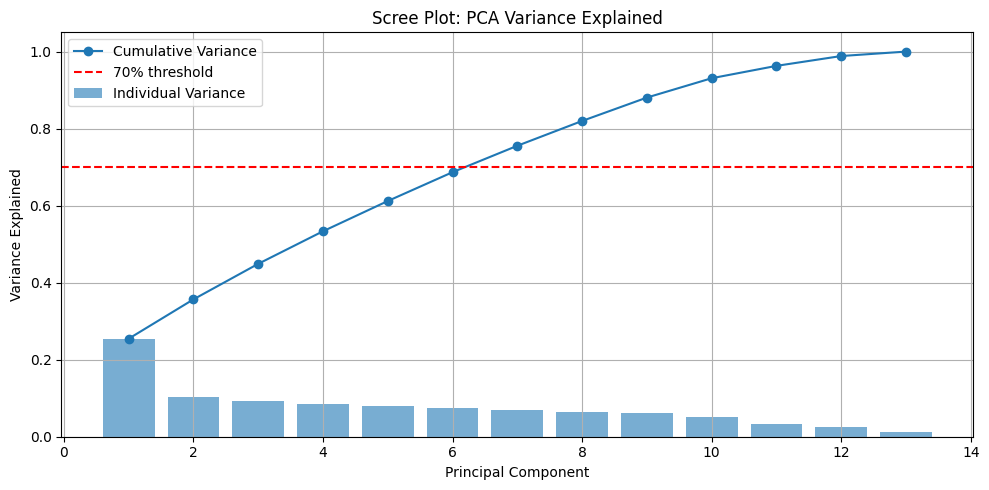

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(individual_var)+1), cumulative_var, marker='o', label='Cumulative Variance')
plt.bar(range(1, len(individual_var)+1), individual_var, alpha=0.6, label='Individual Variance')
plt.axhline(y=0.7, color='r', linestyle='--', label='70% threshold')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot: PCA Variance Explained')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

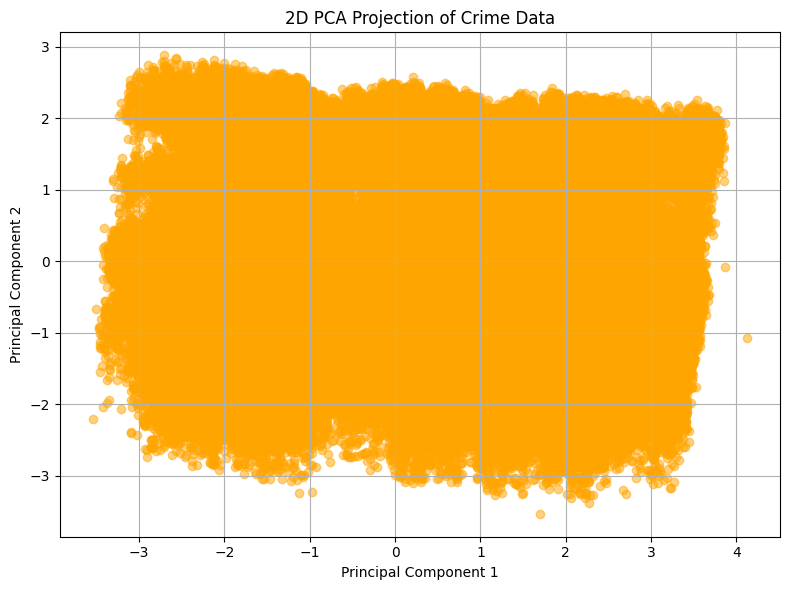

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, c='orange')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection of Crime Data')
plt.grid(True)
plt.tight_layout()
plt.show()

### t-SNE or UMAP 

In [2]:
import pandas as pd
df = pd.read_csv('Crimes_2023_to_2025_CLEANED.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496465 entries, 0 to 496464
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    496465 non-null  int64  
 1   Case Number           496465 non-null  object 
 2   IUCR                  496465 non-null  object 
 3   FBI Code              496465 non-null  object 
 4   Primary Type          496465 non-null  object 
 5   Description           496465 non-null  object 
 6   Location Description  496465 non-null  object 
 7   Date                  496465 non-null  object 
 8   Year                  496465 non-null  int64  
 9   Updated On            496465 non-null  object 
 10  Block                 496465 non-null  object 
 11  Latitude              496465 non-null  float64
 12  Longitude             496465 non-null  float64
 13  Location              496465 non-null  object 
 14  X Coordinate          496465 non-null  float64
 15  

In [3]:
df = df.sample(n=20000, random_state=42)

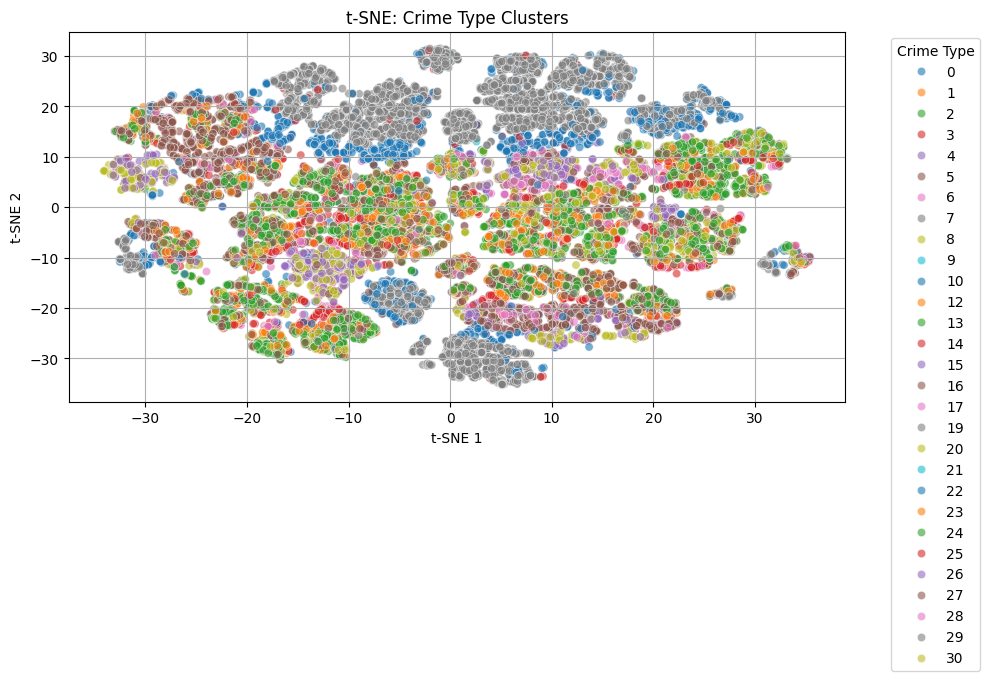

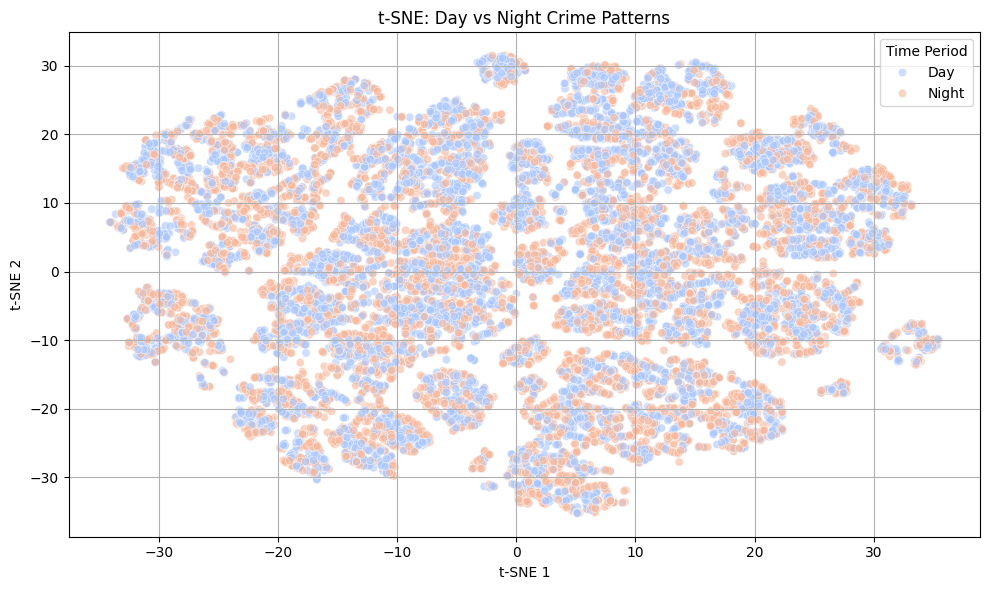

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Step 1: Create scaled time features if they don't exist
if 'Hour_scaled' not in df.columns:
    df['Hour_scaled'] = StandardScaler().fit_transform(df[['Hour']])
if 'Day_scaled' not in df.columns:
    df['Day_of_Week_Num'] = df['Day_of_Week'].map({
        'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
        'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
    })
    df['Day_scaled'] = StandardScaler().fit_transform(df[['Day_of_Week_Num']])
if 'Month_scaled' not in df.columns:
    df['Month_scaled'] = StandardScaler().fit_transform(df[['Month']])

# Step 2: Define features
feature_list = [
    'Latitude_scaled', 'Longitude_scaled',
    'Hour_scaled', 'Day_scaled', 'Month_scaled',
    'Crime_Severity', 'Primary_Type_Code',
    'Location_Code', 'Location_Freq',
    'Year', 'District', 'Ward', 'Community Area'
]

# Step 3: Prepare and scale data
X = df[feature_list]
X_scaled = StandardScaler().fit_transform(X)

# Step 4: Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=500, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


# Step 5: Plot by crime type
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Primary_Type_Code'], palette='tab10', alpha=0.6)
plt.title('t-SNE: Crime Type Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

# Step 6: Plot by time period (Day vs Night)
df['Time_Period'] = df['Hour'].apply(lambda x: 'Night' if x < 6 or x >= 18 else 'Day')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Time_Period'], palette='coolwarm', alpha=0.6)
plt.title('t-SNE: Day vs Night Crime Patterns')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Time Period')
plt.tight_layout()
plt.grid(True)
plt.show()

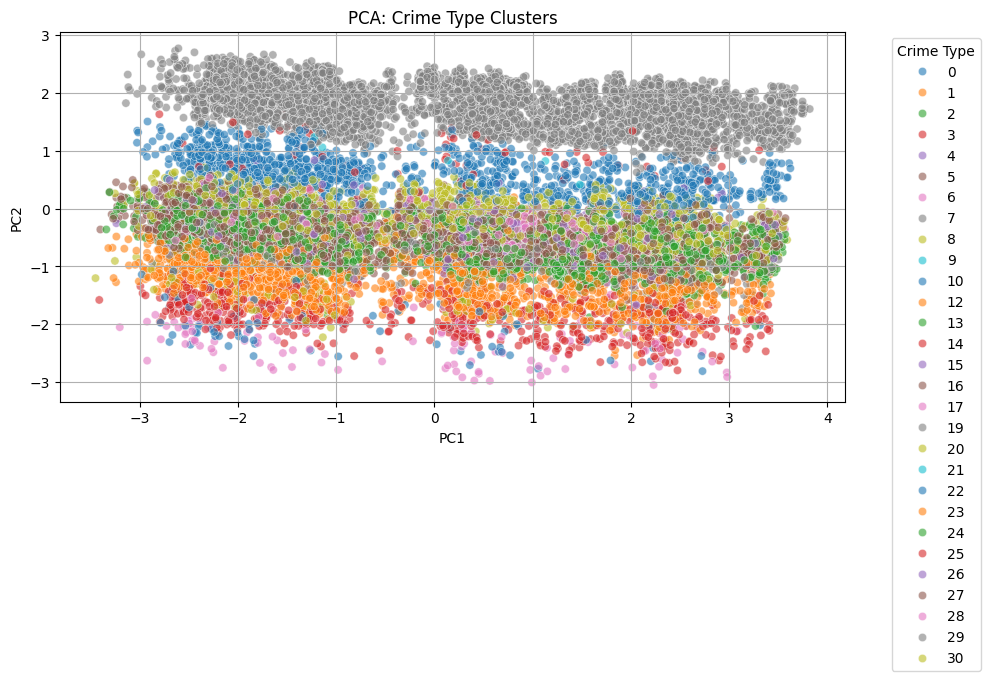

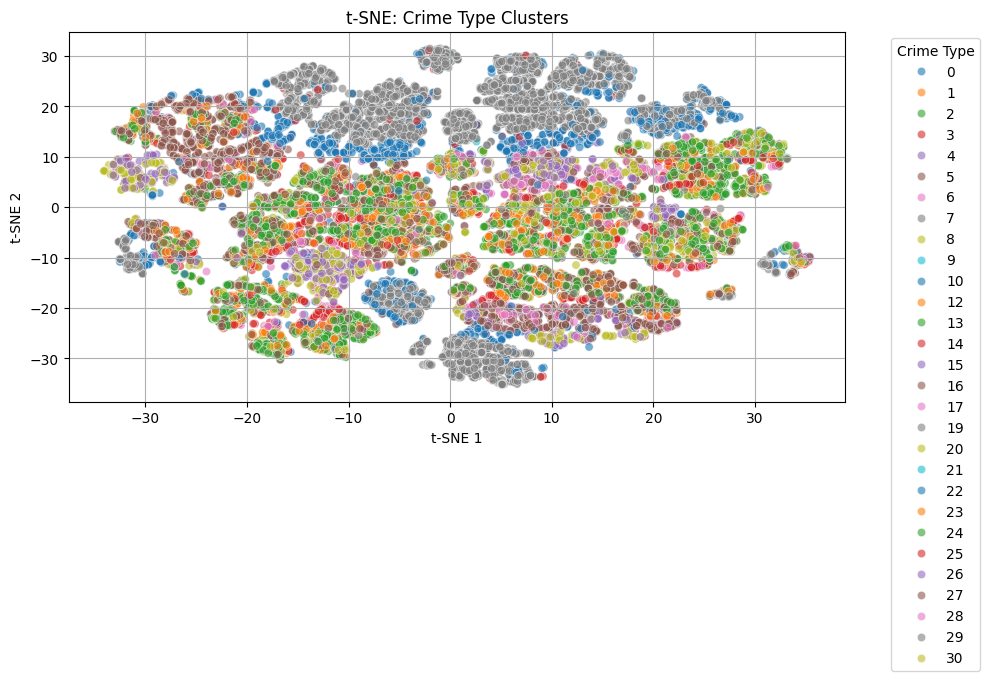

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Prepare scaled features
feature_list = [
    'Latitude_scaled', 'Longitude_scaled',
    'Hour_scaled', 'Day_scaled', 'Month_scaled',
    'Crime_Severity', 'Primary_Type_Code',
    'Location_Code', 'Location_Freq',
    'Year', 'District', 'Ward', 'Community Area'
]

X = df[feature_list]
X_scaled = StandardScaler().fit_transform(X)

# Step 2: PCA projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: t-SNE projection
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=500, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Step 4: Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Primary_Type_Code'], palette='tab10', alpha=0.6)
plt.title('PCA: Crime Type Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

# Step 5: Plot t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Primary_Type_Code'], palette='tab10', alpha=0.6)
plt.title('t-SNE: Crime Type Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

In [2]:
df = df.sample(n=100000, random_state=42)

c:\Projects\PatrollQ\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Projects\PatrollQ\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


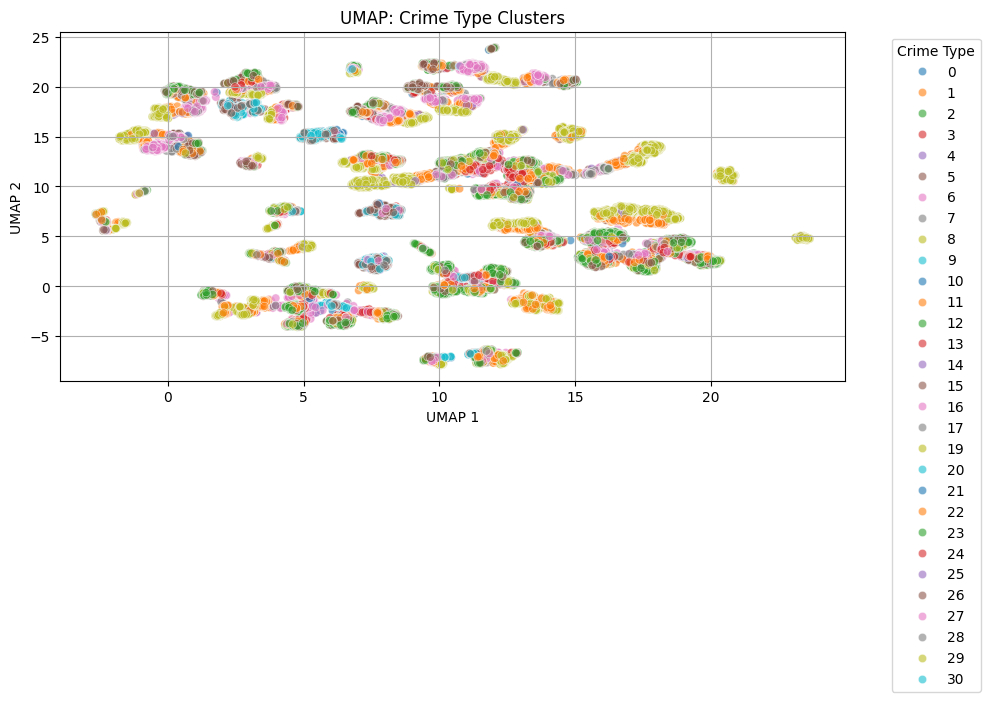

In [3]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
if 'Hour_scaled' not in df.columns:
    df['Hour_scaled'] = StandardScaler().fit_transform(df[['Hour']])
if 'Day_scaled' not in df.columns:
    df['Day_of_Week_Num'] = df['Day_of_Week'].map({
        'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
        'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
    })
    df['Day_scaled'] = StandardScaler().fit_transform(df[['Day_of_Week_Num']])
if 'Month_scaled' not in df.columns:
    df['Month_scaled'] = StandardScaler().fit_transform(df[['Month']])
feature_list = [
    'Latitude_scaled', 'Longitude_scaled',
    'Hour_scaled', 'Day_scaled', 'Month_scaled',
    'Crime_Severity', 'Primary_Type_Code',
    'Location_Code', 'Location_Freq',
    'Year', 'District', 'Ward', 'Community Area'
]


# Step 1: Prepare scaled features
X_scaled = StandardScaler().fit_transform(df[feature_list])

# Step 2: Run UMAP
reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Step 3: Plot by crime type
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df['Primary_Type_Code'], palette='tab10', alpha=0.6)
plt.title('UMAP: Crime Type Clusters')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

### sample


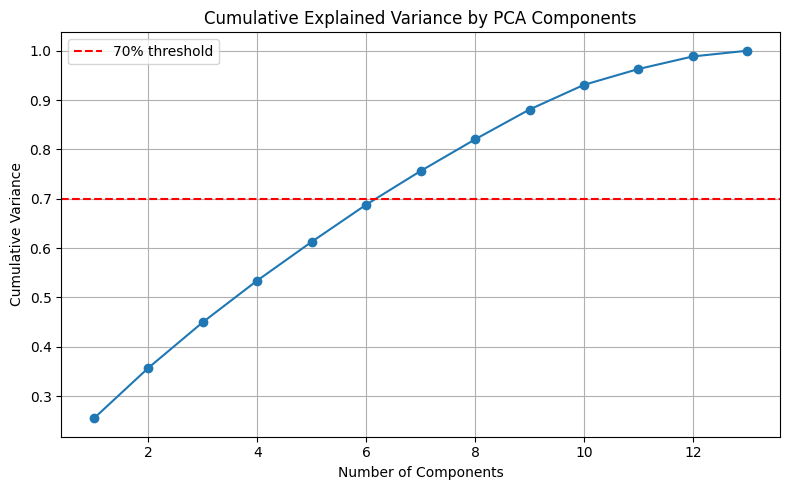

Top 5 features driving crime patterns (PC1):
Latitude_scaled     0.503710
Ward                0.470785
District            0.453422
Community Area      0.420237
Longitude_scaled    0.360144
dtype: float64
Top 5 features driving crime patterns (PC2):
Primary_Type_Code    0.670272
Crime_Severity       0.664755
Location_Freq        0.220334
Longitude_scaled     0.172953
Hour_scaled          0.112849
dtype: float64


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

if 'Hour_scaled' not in df.columns:
    df['Hour_scaled'] = StandardScaler().fit_transform(df[['Hour']])
if 'Day_scaled' not in df.columns:
    df['Day_of_Week_Num'] = df['Day_of_Week'].map({
        'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
        'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
    })
    df['Day_scaled'] = StandardScaler().fit_transform(df[['Day_of_Week_Num']])
if 'Month_scaled' not in df.columns:
    df['Month_scaled'] = StandardScaler().fit_transform(df[['Month']])
# Step 1: Select and scale features
feature_list = [
    'Latitude_scaled', 'Longitude_scaled',
    'Hour_scaled', 'Day_scaled', 'Month_scaled',
    'Crime_Severity', 'Primary_Type_Code',
    'Location_Code', 'Location_Freq',
    'Year', 'District', 'Ward', 'Community Area'
]
X = df[feature_list]
X_scaled = StandardScaler().fit_transform(X)

# Step 2: Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Explained variance
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.axhline(y=0.70, color='r', linestyle='--', label='70% threshold')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 4: Top 5 most important features
loading_scores = np.abs(pca.components_[0])  # PC1 loadings
feature_importance = pd.Series(loading_scores, index=feature_list).sort_values(ascending=False)
top5_features = feature_importance.head(5)
print("Top 5 features driving crime patterns (PC1):")
print(top5_features)
loading_scores = np.abs(pca.components_[1])  # PC2 loadings
feature_importance = pd.Series(loading_scores, index=feature_list).sort_values(ascending=False)
top5_features = feature_importance.head(5)
print("Top 5 features driving crime patterns (PC2):")
print(top5_features)

In [1]:
import pandas as pd
df= pd.read_csv('Crimes_2023_to_2025_CLEANED.csv')
df = df.sample(n=20000, random_state=42)

In [2]:
from sklearn.preprocessing import StandardScaler
feature_list = [
    'Latitude_scaled', 'Longitude_scaled',
    'Hour_scaled', 'Day_scaled', 'Month_scaled',
    'Crime_Severity', 'Primary_Type_Code',
    'Location_Code', 'Location_Freq',
    'Year', 'District', 'Ward', 'Community Area'
]
if 'Hour_scaled' not in df.columns:
    df['Hour_scaled'] = StandardScaler().fit_transform(df[['Hour']])
if 'Day_scaled' not in df.columns:
    df['Day_of_Week_Num'] = df['Day_of_Week'].map({
        'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
        'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
    })
    df['Day_scaled'] = StandardScaler().fit_transform(df[['Day_of_Week_Num']])
if 'Month_scaled' not in df.columns:
    df['Month_scaled'] = StandardScaler().fit_transform(df[['Month']])

c:\Projects\PatrollQ\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Projects\PatrollQ\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


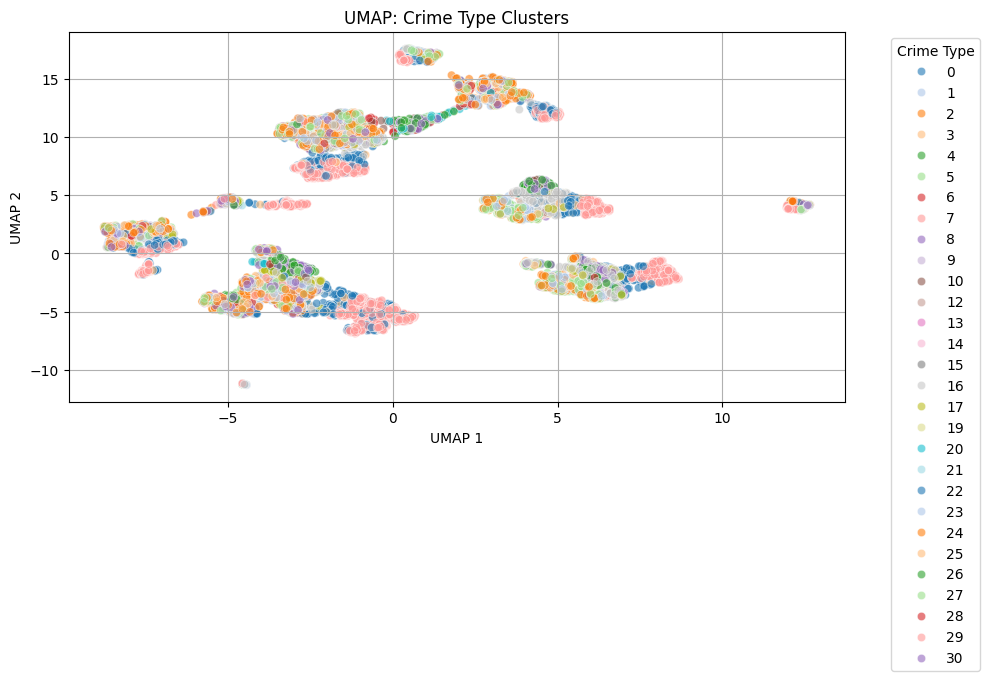

In [3]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
# Step 1: Use same scaled features
X_scaled = StandardScaler().fit_transform(df[feature_list])

# Step 2: Run UMAP
reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Step 3: Plot clusters by crime type
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df['Primary_Type_Code'], palette='tab20', alpha=0.6)
plt.title('UMAP: Crime Type Clusters')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

### mlflow



In [6]:
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# -----------------------------
# Load Dataset
# -----------------------------
df = pd.read_csv('data/Crimes_2023_to_2025_CLEANED.csv')
df_sample = df.sample(n=20000, random_state=42)
X = df_sample[['Latitude_scaled', 'Longitude_scaled']]

# -----------------------------
# MLflow Setup
# -----------------------------
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("PatrolIQ-Clustering")

# -----------------------------
# KMeans Experiment
# -----------------------------
with mlflow.start_run(run_name="KMeans_Experiment"):
    kmeans = KMeans(n_clusters=3, random_state=42)
    df_sample['KMeans_Cluster'] = kmeans.fit_predict(X)

    sil = silhouette_score(X, df_sample['KMeans_Cluster'])
    dbi = davies_bouldin_score(X, df_sample['KMeans_Cluster'])

    mlflow.log_param("algorithm", "KMeans")
    mlflow.log_param("n_clusters", 3)
    mlflow.log_metric("silhouette", sil)
    mlflow.log_metric("DaviesBouldin", dbi)

    # Log model
    mlflow.sklearn.log_model(kmeans, artifact_path="KMeans_Model")

    # Plot clusters
    plt.figure(figsize=(10,8))
    plt.scatter(df_sample['Longitude'], df_sample['Latitude'], 
                c=df_sample['KMeans_Cluster'], cmap='tab10', s=5, alpha=0.6)
    plt.colorbar(label='Cluster')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Crime Hotspots (KMeans)')
    kmeans_plot = "kmeans_clusters.png"
    plt.savefig(kmeans_plot)
    plt.close()
    mlflow.log_artifact(kmeans_plot)

# -----------------------------
# DBSCAN Experiment
# -----------------------------
with mlflow.start_run(run_name="DBSCAN_Experiment"):
    dbscan = DBSCAN(eps=0.4, min_samples=40)
    df_sample['DBSCAN_Cluster'] = dbscan.fit_predict(X)

    mask = df_sample['DBSCAN_Cluster'] != -1
    if mask.sum() > 1:
        sil = silhouette_score(X[mask], df_sample.loc[mask, 'DBSCAN_Cluster'])
        dbi = davies_bouldin_score(X[mask], df_sample.loc[mask, 'DBSCAN_Cluster'])
    else:
        sil, dbi = -1, -1

    mlflow.log_param("algorithm", "DBSCAN")
    mlflow.log_param("eps", 0.4)
    mlflow.log_param("min_samples", 40)
    mlflow.log_metric("silhouette", sil)
    mlflow.log_metric("DaviesBouldin", dbi)

    # Log model
    mlflow.sklearn.log_model(dbscan, artifact_path="DBSCAN_Model")

    # Plot clusters
    plt.figure(figsize=(10,8))
    plt.scatter(df_sample['Longitude'], df_sample['Latitude'], 
                c=df_sample['DBSCAN_Cluster'], cmap='tab20', s=5, alpha=0.6)
    plt.colorbar(label='DBSCAN Cluster')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Crime Hotspots (DBSCAN)')
    dbscan_plot = "dbscan_clusters.png"
    plt.savefig(dbscan_plot)
    plt.close()
    mlflow.log_artifact(dbscan_plot)

# -----------------------------
# Hierarchical Clustering Experiment
# -----------------------------
with mlflow.start_run(run_name="Hierarchical_Clustering"):
    agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
    df_sample['HierCluster'] = agg.fit_predict(X)

    sil = silhouette_score(X, df_sample['HierCluster'])
    dbi = davies_bouldin_score(X, df_sample['HierCluster'])

    mlflow.log_param("algorithm", "AgglomerativeClustering")
    mlflow.log_param("n_clusters", 4)
    mlflow.log_metric("silhouette", sil)
    mlflow.log_metric("DaviesBouldin", dbi)

    # Log model
    mlflow.sklearn.log_model(agg, artifact_path="Hierarchical_Model")

    # Plot clusters
    plt.figure(figsize=(10,8))
    plt.scatter(df_sample['Longitude'], df_sample['Latitude'], 
                c=df_sample['HierCluster'], cmap='tab20', s=5, alpha=0.6)
    plt.colorbar(label='Hierarchical Cluster')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Crime Hotspots (Hierarchical Clustering)')
    hier_plot = "hier_clusters.png"
    plt.savefig(hier_plot)
    plt.close()
    mlflow.log_artifact(hier_plot)

# -----------------------------
# Optional: Crime Risk Grid Map
# -----------------------------
lat_bins = np.linspace(df_sample['Latitude'].min(), df_sample['Latitude'].max(), 50)
lon_bins = np.linspace(df_sample['Longitude'].min(), df_sample['Longitude'].max(), 50)
df_sample['lat_bin'] = np.digitize(df_sample['Latitude'], lat_bins)
df_sample['lon_bin'] = np.digitize(df_sample['Longitude'], lon_bins)
grid_counts = df_sample.groupby(['lat_bin','lon_bin']).size().reset_index(name='crime_count')

high_thresh = grid_counts['crime_count'].quantile(0.90)
med_thresh = grid_counts['crime_count'].quantile(0.70)

def classify_risk(count):
    if count >= high_thresh:
        return 'High'
    elif count >= med_thresh:
        return 'Medium'
    else:
        return 'Low'

grid_counts['risk_level'] = grid_counts['crime_count'].apply(classify_risk)
grid_counts['lat_center'] = [lat_bins[i-1] for i in grid_counts['lat_bin']]
grid_counts['lon_center'] = [lon_bins[i-1] for i in grid_counts['lon_bin']]

plt.figure(figsize=(10,8))
risk_colors = {'High': 'red', 'Medium': 'yellow', 'Low': 'green'}
for risk, color in risk_colors.items():
    subset = grid_counts[grid_counts['risk_level'] == risk]
    plt.scatter(subset['lon_center'], subset['lat_center'], 
                color=color, label=risk, alpha=0.6, s=50)
plt.scatter(df_sample['Longitude'], df_sample['Latitude'], 
            color='gray', alpha=0.2, s=5, label='Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Chicago Crime Risk Zones")
plt.legend(title="Risk Level")
plt.grid(True)
plt.tight_layout()
plt.savefig("risk_zones.png")
plt.close()
mlflow.log_artifact("risk_zones.png")

print("All clustering models and plots logged successfully to MLflow!")


2025/11/23 00:29:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/23 00:29:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run KMeans_Experiment at: http://127.0.0.1:5000/#/experiments/873737492296709931/runs/4845dffa32d44935ab51f7dc01240f04
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873737492296709931


2025/11/23 00:29:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/23 00:29:19 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/11/23 00:29:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run DBSCAN_Experiment at: http://127.0.0.1:5000/#/experiments/873737492296709931/runs/8eda283468304548866781378f5627c4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873737492296709931


2025/11/23 00:30:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/23 00:30:05 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/11/23 00:30:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Hierarchical_Clustering at: http://127.0.0.1:5000/#/experiments/873737492296709931/runs/93c52cd20d7f4289884d24e19422804b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873737492296709931
All clustering models and plots logged successfully to MLflow!


2025/11/23 00:53:57 INFO mlflow.tracking.fluent: Experiment with name 'Temporal Clustering' does not exist. Creating a new experiment.


2025/11/23 00:53:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/23 00:55:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Temporal_KMeans_Clustering at: http://127.0.0.1:5000/#/experiments/702219540321182259/runs/979c2b0633774fba9dde77d5913d30dc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/702219540321182259


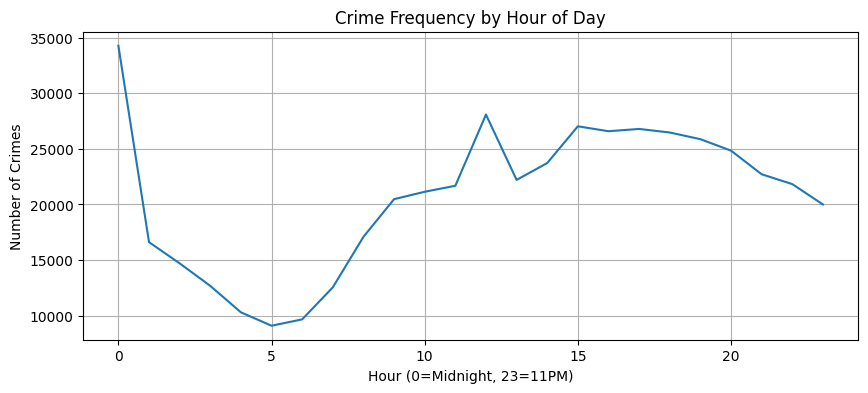

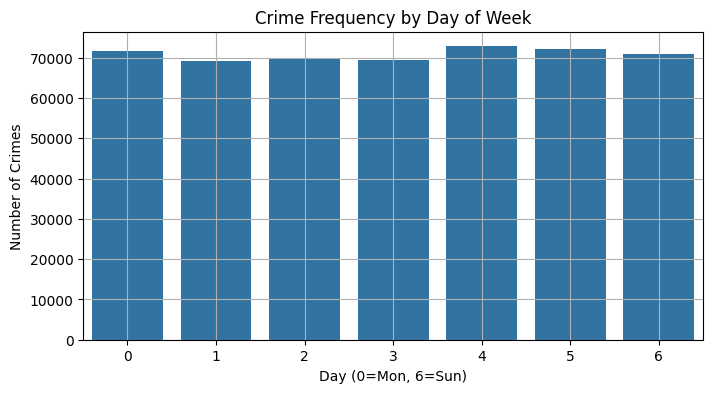

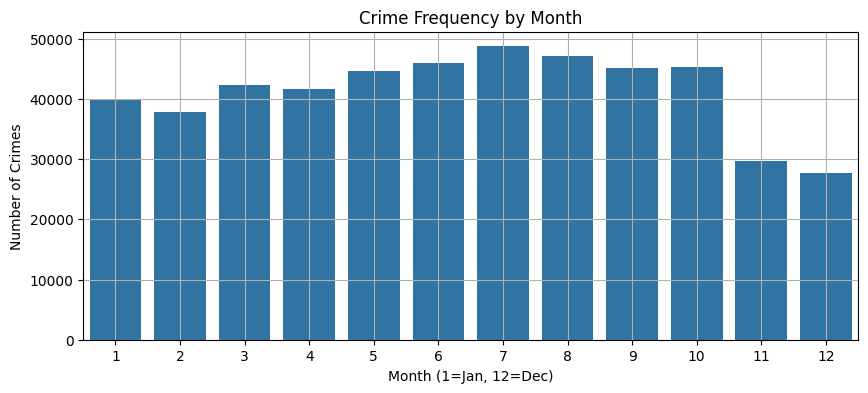

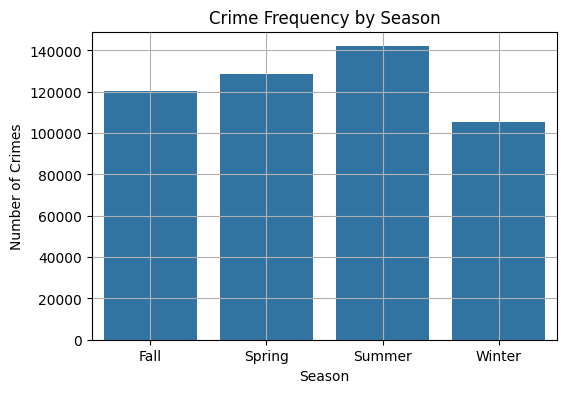

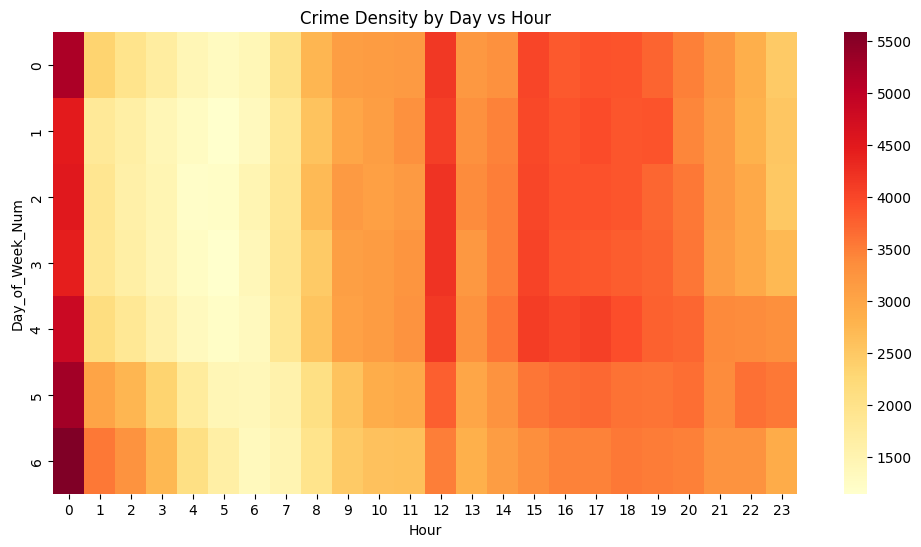

In [19]:
import mlflow

# Connect to MLflow tracking server
mlflow.set_tracking_uri("http://127.0.0.1:5000")   # or your remote server
mlflow.set_experiment("Temporal Clustering")
import mlflow
import matplotlib.pyplot as plt
import seaborn as sns

with mlflow.start_run(run_name="Temporal_KMeans_Clustering"):
    # Log parameters
    mlflow.log_param("algorithm", "KMeans")
    mlflow.log_param("feature_set", "temporal")
    mlflow.log_param("features_used", ["Hour", "Day_of_Week_Num", "Month"])
    mlflow.log_param("best_k", best_k)
    best_kmeans_model = KMeans(n_clusters=best_k, random_state=42)
    best_kmeans_model.fit(X_temp_scaled)

    # Log metrics
    mlflow.log_metric("silhouette_score", best_score)

    # -----------------------------
    # 1. Hourly Crime Pattern Plot
    # -----------------------------
    plt.figure(figsize=(10,4))
    hourly_counts = df.groupby('Hour').size()
    sns.lineplot(x=hourly_counts.index, y=hourly_counts.values)
    plt.title("Crime Frequency by Hour of Day")
    plt.xlabel("Hour (0=Midnight, 23=11PM)")
    plt.ylabel("Number of Crimes")
    plt.grid(True)
    plt.savefig("hourly_pattern.png")
    mlflow.log_artifact("hourly_pattern.png")

    # -----------------------------
    # 2. Weekly Crime Pattern Plot
    # -----------------------------
    plt.figure(figsize=(8,4))
    weekday_counts = df.groupby('Day_of_Week_Num').size()
    sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
    plt.title("Crime Frequency by Day of Week")
    plt.xlabel("Day (0=Mon, 6=Sun)")
    plt.ylabel("Number of Crimes")
    plt.grid(True)
    plt.savefig("weekday_pattern.png")
    mlflow.log_artifact("weekday_pattern.png")

    # -----------------------------
    # 3. Monthly Crime Pattern Plot
    # -----------------------------
    plt.figure(figsize=(10,4))
    monthly_counts = df.groupby('Month').size()
    sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
    plt.title("Crime Frequency by Month")
    plt.xlabel("Month (1=Jan, 12=Dec)")
    plt.ylabel("Number of Crimes")
    plt.grid(True)
    plt.savefig("monthly_pattern.png")
    mlflow.log_artifact("monthly_pattern.png")

    # -----------------------------
    # 4. Seasonal Crime Heatmap
    # -----------------------------
    plt.figure(figsize=(6,4))
    season_counts = df.groupby('Season').size()
    sns.barplot(x=season_counts.index, y=season_counts.values)
    plt.title("Crime Frequency by Season")
    plt.xlabel("Season")
    plt.ylabel("Number of Crimes")
    plt.grid(True)
    plt.savefig("seasonal_pattern.png")
    mlflow.log_artifact("seasonal_pattern.png")

    # -----------------------------
    # 5. Hour vs Day Heatmap
    # -----------------------------
    plt.figure(figsize=(12,6))
    heatmap_data = df.groupby(['Day_of_Week_Num','Hour']).size().unstack()
    sns.heatmap(heatmap_data, cmap='YlOrRd')
    plt.title("Crime Density by Day vs Hour")
    plt.savefig("day_hour_heatmap.png")
    mlflow.log_artifact("day_hour_heatmap.png")

    mlflow.sklearn.log_model(best_kmeans_model, "Temporal_KMeans_Model")


In [2]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.pyfunc
import pickle
import os
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# LOAD & PREPARE DATA
# ==============================
df = pd.read_csv('data/Crimes_2023_to_2025_CLEANED.csv')
df = df.sample(n=20000, random_state=42)

feature_list = [
    'Latitude_scaled', 'Longitude_scaled',
    'Hour_scaled', 'Day_scaled', 'Month_scaled',
    'Crime_Severity', 'Primary_Type_Code',
    'Location_Code', 'Location_Freq',
    'Year', 'District', 'Ward', 'Community Area'
]

# Ensure scaled fields exist
if 'Hour_scaled' not in df.columns:
    df['Hour_scaled'] = StandardScaler().fit_transform(df[['Hour']])

if 'Day_scaled' not in df.columns:
    df['Day_of_Week_Num'] = df['Day_of_Week'].map({
        'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
        'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
    })
    df['Day_scaled'] = StandardScaler().fit_transform(df[['Day_of_Week_Num']])

if 'Month_scaled' not in df.columns:
    df['Month_scaled'] = StandardScaler().fit_transform(df[['Month']])

# ==============================
# RUN UMAP
# ==============================
X_scaled = StandardScaler().fit_transform(df[feature_list])

reducer = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
)

X_umap = reducer.fit_transform(X_scaled)

df['TimePeriod'] = df['Hour'].apply(lambda x: "Day" if x < 18 else "Night")

# ==============================
# SAVE MODEL LOCALLY (Required for registration)
# ==============================
os.makedirs("umap_model", exist_ok=True)
pickle.dump(reducer, open("umap_model/model.pkl", "wb"))

# ==============================
# PYFUNC WRAPPER
# ==============================
class UMAPWrapper(mlflow.pyfunc.PythonModel):
    def load_context(self, context):
        self.model = pickle.load(open(context.artifacts["umap_model"], "rb"))

    def predict(self, context, model_input):
        return self.model.transform(model_input)

# ==============================
# START MLflow RUN
# ==============================
with mlflow.start_run(run_name="UMAP_Crime_Clusters_Registered"):

    # PARAMETERS
    mlflow.log_param("algorithm", "UMAP")
    mlflow.log_param("n_neighbors", 15)
    mlflow.log_param("min_dist", 0.1)
    mlflow.log_param("n_components", 2)
    mlflow.log_param("features_used", feature_list)

    # ========= PLOTS =========

    # Crime Type Plot (from your first snippet)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1],
                    hue=df['Primary_Type_Code'], palette='tab20', alpha=0.6)
    plt.title("UMAP: Crime Type Clusters")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("umap_crime_type.png")
    mlflow.log_artifact("umap_crime_type.png")
    plt.close()

    # Day vs Night Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1],
                    hue=df['TimePeriod'], palette={'Day': 'blue', 'Night': 'orange'}, alpha=0.6)
    plt.title("UMAP: Day vs Night Crime Patterns")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("umap_day_night.png")
    mlflow.log_artifact("umap_day_night.png")
    plt.close()

    # ========= EMBEDDING CSV =========
    umap_df = pd.DataFrame({
        "UMAP1": X_umap[:, 0],
        "UMAP2": X_umap[:, 1],
        "Primary_Type_Code": df["Primary_Type_Code"],
        "TimePeriod": df["TimePeriod"]
    })
    umap_df.to_csv("umap_embeddings.csv", index=False)
    mlflow.log_artifact("umap_embeddings.csv")

    # ========= REGISTER MODEL =========
    mlflow.pyfunc.log_model(
        artifact_path="UMAP_Model",
        python_model=UMAPWrapper(),
        artifacts={"umap_model": "umap_model/model.pkl"},
        registered_model_name="UMAP_Dimensionality_Reduced_Model"
    )

mlflow.end_run()

c:\Projects\PatrollQ\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Projects\PatrollQ\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Projects\PatrollQ\.venv\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(
2025/11/23 01:20:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/23 01:21:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_exa

🏃 View run UMAP_Crime_Clusters_Registered at: http://127.0.0.1:5000/#/experiments/830657570369720766/runs/64cd0281de57407f8a3566046961f2c3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/830657570369720766


In [ ]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
mlflow.set_experiment("PatrolIQ-PCA")
# -----------------------------
# LOAD & PREPARE DATA
# -----------------------------
df = pd.read_csv("data/Crimes_2023_to_2025_CLEANED.csv")

# Sample for efficiency
df = df.sample(n=20000, random_state=42)

# Create scaled columns if missing
if 'Hour_scaled' not in df.columns:
    df['Hour_scaled'] = StandardScaler().fit_transform(df[['Hour']])

if 'Day_scaled' not in df.columns:
    df['Day_of_Week_Num'] = df['Day_of_Week'].map({
        'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
        'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
    })
    df['Day_scaled'] = StandardScaler().fit_transform(df[['Day_of_Week_Num']])

if 'Month_scaled' not in df.columns:
    df['Month_scaled'] = StandardScaler().fit_transform(df[['Month']])

# Feature list
feature_list = [
    'Latitude_scaled', 'Longitude_scaled',
    'Hour_scaled', 'Day_scaled', 'Month_scaled',
    'Crime_Severity', 'Primary_Type_Code',
    'Location_Code', 'Location_Freq',
    'Year', 'District', 'Ward', 'Community Area'
]

X = df[feature_list]
X_scaled = StandardScaler().fit_transform(X)

# -----------------------------
# PCA
# -----------------------------
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

# -----------------------------
# MLflow Logging + Registration
# -----------------------------
model_name = "PCA_Dimensionality_Reduction_Model"

with mlflow.start_run(run_name="PCA_Dimensionality_Reduction") as run:

    # Log parameters
    mlflow.log_param("algorithm", "PCA")
    mlflow.log_param("features_used", feature_list)

    # Log metrics
    mlflow.log_metric("components_needed_for_70pct",
                      int((cum_var >= 0.70).argmax() + 1))

    # Reconstruction error
    X_reconstructed = pca.inverse_transform(X_pca)
    reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2)
    mlflow.log_metric("pca_reconstruction_error", reconstruction_error)

    # Log explained variance (first 10 PCs)
    for i, val in enumerate(explained_var[:10]):
        mlflow.log_metric(f"explained_variance_PC{i+1}", float(val))

    # Save Scree Plot
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o')
    plt.axhline(y=0.70, color='r', linestyle='--')
    plt.title("Cumulative Explained Variance")
    plt.xlabel("Components")
    plt.ylabel("Cumulative Variance")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("pca_variance_plot.png")
    mlflow.log_artifact("pca_variance_plot.png")
    plt.close()

    # Log PCA model + REGISTER IT
    mlflow.sklearn.log_model(
        sk_model=pca,
        artifact_path="pca_model",
        registered_model_name=model_name
    )

print(f"\n🎉 Model Successfully Registered as: {model_name}\n")


2025/11/23 01:44:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/23 01:44:30 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/11/23 01:44:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'PCA_Dimensionality_Reduction_Model'.
2025/11/23 01:44:34 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: PCA_Dimensionality_Reduction_Model, version 1
Created version '1' of model 'PCA_Dimensionality_Reduction_Model'.


🏃 View run PCA_Dimensionality_Reduction at: http://127.0.0.1:5000/#/experiments/150500204737805743/runs/3ee91f4ff41d42259a433095768e61e0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/150500204737805743

🎉 Model Successfully Registered as: PCA_Dimensionality_Reduction_Model



In [1]:
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # if using a local MLflow server
mlflow.set_experiment("PatrolIQ-UMAP")            # choose a descriptive name

2025/11/23 01:19:51 INFO mlflow.tracking.fluent: Experiment with name 'PatrolIQ-UMAP' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/830657570369720766', creation_time=1763840991503, experiment_id='830657570369720766', last_update_time=1763840991503, lifecycle_stage='active', name='PatrolIQ-UMAP', tags={}>

In [8]:
import mlflow

# Check active run
active = mlflow.active_run()
if active is not None:
    print(f"Ending active run: {active.info.run_id}")
    try:
        mlflow.end_run()
    except Exception as e:
        print("Could not end run:", e)
else:
    print("No active run found. Safe to start new runs.")


Ending active run: 24892cf1be014c80badcae12424fe08c
🏃 View run secretive-cat-917 at: http://127.0.0.1:5000/#/experiments/873737492296709931/runs/24892cf1be014c80badcae12424fe08c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873737492296709931


In [24]:
run_id = "979c2b0633774fba9dde77d5913d30dc"
model_uri = f"runs:/{run_id}/Temporal_KMeans_Model"

registered_model = mlflow.register_model(
    model_uri=model_uri,
    name="Temporal_KMeans_Model"
)

print("Registered model name:", registered_model.name)
print("Version:", registered_model.version)


Successfully registered model 'Temporal_KMeans_Model'.
2025/11/23 01:03:35 WARNING mlflow.tracking._model_registry.fluent: Run with id 979c2b0633774fba9dde77d5913d30dc has no artifacts at artifact path 'Temporal_KMeans_Model', registering model based on models:/m-86961cb4b5214fd68795e12265b31ff2 instead
2025/11/23 01:03:35 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Temporal_KMeans_Model, version 1


Registered model name: Temporal_KMeans_Model
Version: 1


Created version '1' of model 'Temporal_KMeans_Model'.


In [ ]:
run_id = "8eda283468304548866781378f5627c4"
model_uri = f"runs:/{run_id}/DBSCAN_Model"

registered_model = mlflow.register_model(
    model_uri=model_uri,
    name="DBSCAN_Model"
)

print("Registered model name:", registered_model.name)
print("Version:", registered_model.version)


In [5]:
from mlflow import MlflowClient

client = MlflowClient()

models = client.search_registered_models()

for m in models:
    print("Model Name:", m.name)
    for v in m.latest_versions:
        print(" - Version:", v.version, "| Run ID:", v.run_id)


Model Name: DBSCAN_Model
 - Version: 1 | Run ID: 8eda283468304548866781378f5627c4
Model Name: PCA_Dimensionality_Reduction_Model
 - Version: 1 | Run ID: 3ee91f4ff41d42259a433095768e61e0
Model Name: Temporal_KMeans_Model
 - Version: 1 | Run ID: 979c2b0633774fba9dde77d5913d30dc
Model Name: UMAP_Dimensionality_Reduced_Model
 - Version: 1 | Run ID: 64cd0281de57407f8a3566046961f2c3


In [17]:
import mlflow
from mlflow.tracking import MlflowClient

client = MlflowClient()
experiment_id = " 735016816067196848"  # replace with your experiment ID

# Search all runs in the experiment
runs = client.search_runs(experiment_ids=[experiment_id])

# Delete each run
for run in runs:
    client.delete_run(run.info.run_id)

In [ ]:
import mlflow
from mlflow.tracking import MlflowClient

client = MlflowClient()

# Replace with your model name
model_name = "DBSCAN_Model"

# Delete the registered model
client.delete_registered_model(model_name)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 61494 to 39164
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    20000 non-null  int64  
 1   Case Number           20000 non-null  object 
 2   IUCR                  20000 non-null  object 
 3   FBI Code              20000 non-null  object 
 4   Primary Type          20000 non-null  object 
 5   Description           20000 non-null  object 
 6   Location Description  20000 non-null  object 
 7   Date                  20000 non-null  object 
 8   Year                  20000 non-null  int64  
 9   Updated On            20000 non-null  object 
 10  Block                 20000 non-null  object 
 11  Latitude              20000 non-null  float64
 12  Longitude             20000 non-null  float64
 13  Location              20000 non-null  object 
 14  X Coordinate          20000 non-null  float64
 15  Y Coordinate        